# Capstone 2 - KIVA loan analysis

**Context**

Kiva is an online crowdfunding platform to provide financial services to poor and financially excluded people around the world. As of 2018, Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. In order to set better investment priorities, help inform lenders, and understand their target communities, understanding the level of poverty and reason for loaning money is important. However, this requires inference based on limited information for each borrower. 

**Criteria for Success**

Kiva wants to understand whether its loan money is efficiently reaching to the people who really need the money and wants to further find good indicators of poverty and get a better idea/information about the borrowers so it can extend financial services to the people who really need them. 

**Scope of Solution Space**

Find a better indicator of poverty. Gain better idea of poverty around the world as of today.  Gain more knowledge about the borrowers so Kiva can help inform lenders.


## Table of Contents

### 1. Importing libraries

### 2. Understanding the Data

### 3. Data Cleaning

### 4. Exploratory Analysis Part 1

### 5. Exploratory Analysis Par 2

### 6. Inferential Analysis


### 1. Import Libraries: <span style="color:green">Necessary libaries for analysis</span> 

**Matplotlib**

**Pandas**

**Numpy**

**Seaborn**

**statsmodel.api**

**statsmodels.formula.api**

In [154]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import sklearn
import chart_studio.plotly as py
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import scipy.stats

### 2. Understanding Data

#### Read csv files

In [101]:
# read csv data and save it as dataframes

loans = pd.read_csv('kiva_loans.csv', header = 0)
mpi_regions = pd.read_csv('kiva_mpi_region_locations.csv', header = 0)
loan_theme = pd.read_csv('loan_theme_ids.csv', header = 0)
theme_region = pd.read_csv('loan_themes_by_region.csv', header = 0)
world_population = pd.read_csv('WorldPopulation.csv', header = 0)
mpi_subnational = pd.read_csv('mpi_subnational.csv', header = 0)
mpi_national = pd.read_csv('mpi_national.csv', header = 0)

In [137]:
hdi_df = pd.read_csv('human_development_index.csv', header = 0)



#### Explore data

In [4]:
display(loans)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12,12,NaN,female,irregular,1/1/14
1,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11,14,NaN,"female, female",irregular,1/1/14
2,653068,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43,6,"user_favorite, user_favorite",female,bullet,1/1/14
3,653063,200,200,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11,8,NaN,female,irregular,1/1/14
4,653084,400,400,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14,16,NaN,female,monthly,1/1/14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0,25,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13,0,NaN,female,monthly,7/25/17
671201,1340316,25,25,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13,1,NaN,female,monthly,7/25/17
671202,1340334,0,25,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13,0,NaN,NaN,monthly,7/26/17
671203,1340338,0,25,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13,0,NaN,female,monthly,7/26/17


In [5]:
mpi_regions.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LocationName,984,984,"Bombali, Sierra Leone",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISO,1008,102,NGA,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1008,102,Nigeria,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,984,928,Eastern,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
world_region,1008,6,Sub-Saharan Africa,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MPI,984,NaN,NaN,NaN,0.21133,0.183621,0,0.053,0.155,0.3415,0.744
geo,2772,881,"(1000.0, 1000.0)",1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,892,NaN,NaN,NaN,9.16971,16.4845,-34.9479,-1.0279,11.2114,18.0843,49.2647
lon,892,NaN,NaN,NaN,16.6359,61.2346,-122.747,-12.8199,26.4194,47.0194,138.581


In [6]:
display(world_population)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,104822,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,34656032,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,2.175942e+07,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,28813463,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2876101,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,77281,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1.747383e+06,1.761474e+06,1.775680e+06,1.791000e+06,1.805200e+06,1.824100e+06,1.821800e+06,1.801800e+06,1816200,NaN
213,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,27584213,NaN
214,South Africa,ZAF,"Population, total",SP.POP.TOTL,17396367.0,17850045.0,18322335.0,18809939.0,19308166.0,19813947.0,...,4.955757e+07,5.025581e+07,5.097943e+07,5.172935e+07,5.250652e+07,5.331196e+07,5.414673e+07,5.501198e+07,55908865,NaN
215,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,16591390,NaN


In [7]:
print ("Loan data dimensions     : ",loans.shape)
print ("Region data dimensions   : ",mpi_regions.shape)
print ("Loan Theme data dimensions : ",loan_theme.shape)
print ("Theme Region dimensions  : ",theme_region.shape)

Loan data dimensions     :  (671205, 20)
Region data dimensions   :  (2772, 9)
Loan Theme data dimensions :  (779092, 4)
Theme Region dimensions  :  (15736, 21)


**Percentage of missing data**

Text(0.5, 1, 'LOAN THEME ID DATA')

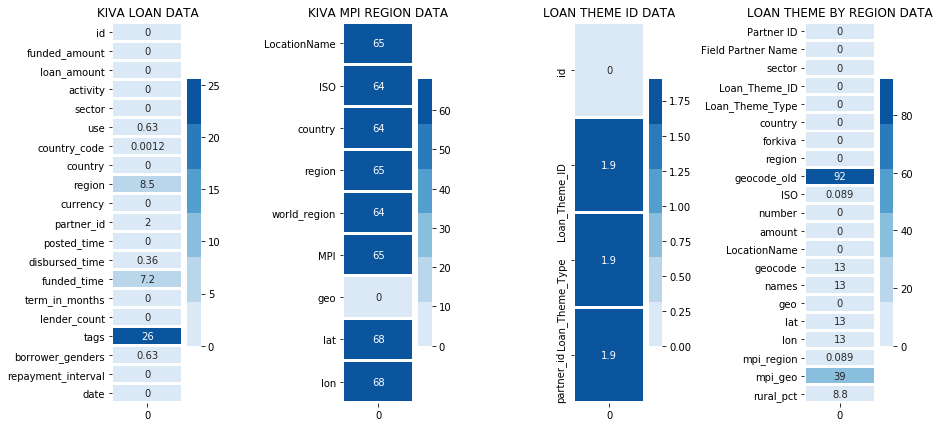

In [8]:
from IPython.display import display, HTML

cm = sns.light_palette("green",as_cmap=True)
plt.figure(figsize=(14,7))

#KIVA LOAN DATA
plt.subplot(1,4,1)
sns.heatmap(pd.DataFrame(loans.isnull().sum()/loans.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.title("KIVA LOAN DATA")

#KIVA MPI REGION DATA
plt.subplot(1,4,2)
sns.heatmap(pd.DataFrame(mpi_regions.isnull().sum()/mpi_regions.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.title("KIVA MPI REGION DATA")

#KIVA LONA THEME BY REGION
plt.subplot(1,4,4)
sns.heatmap(pd.DataFrame(theme_region.isnull().sum()/theme_region.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.subplots_adjust(wspace = 1.6)
plt.title("LOAN THEME BY REGION DATA")

#KIVA LOAN THEME
plt.subplot(1,4,3)
sns.heatmap(pd.DataFrame(loan_theme.isnull().sum()/loan_theme.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.subplots_adjust(wspace = 1.6)
plt.title("LOAN THEME ID DATA")

### 3. Data Cleaning

**Date Manipulation**

In [102]:
from dateutil import parser

# convert to date types
loans["date"] = pd.to_datetime(loans["date"],format="%Y-%m-%d")
loans["posted_time"] = pd.to_datetime(loans["posted_time"],format="%Y-%m-%d %H:%M:%S")
loans["disbursed_time"] = pd.to_datetime(loans["disbursed_time"],format="%Y-%m-%d %H:%M:%S")
loans['funded_time'] = pd.to_datetime(loans['funded_time'],format="%Y-%m-%d %H:%M:%S")

# extracting year ,month ,day  from date
loans["year"] = pd.DatetimeIndex(loans["date"]).year
loans["month"] = pd.DatetimeIndex(loans["date"]).month
loans["day"] = pd.DatetimeIndex(loans["date"]).day
loans["month"] = loans["month"].map({1:"JAN",  2:"FEB",  3:"MAR",  4:"APR",  5:"MAY",  6:"JUN",
                                      7:"JUL",  8:"AUG",  9:"SEP", 10:"OCT", 11:"NOV", 12:"DEC"})
loans["month_year"] = loans["month"]+"-"+loans["year"].astype(str) 
loans[['date', 'year', 'month', 'day','posted_time',"month_year","disbursed_time",'funded_time']].head()

,date,year,month,day,posted_time,month_year,disbursed_time,funded_time
0,2014-01-01,2014,JAN,1,2014-01-01 06:12:39+00:00,JAN-2014,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00
1,2014-01-01,2014,JAN,1,2014-01-01 06:51:08+00:00,JAN-2014,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00
2,2014-01-01,2014,JAN,1,2014-01-01 09:58:07+00:00,JAN-2014,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00
3,2014-01-01,2014,JAN,1,2014-01-01 08:03:11+00:00,JAN-2014,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00
4,2014-01-01,2014,JAN,1,2014-01-01 11:53:19+00:00,JAN-2014,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00


#### Important Variables to consider: 

- Amount of Loan
- Count of Loan
- Country
- Region
- Gorrower Gender
- Activity
- Sector
- Date
- Funded amount
- Repayment Interval
- Loan Theme
- MPI (Poverty Measure) (Multi Dimensional Poverty Index)
- HDI (Human Development Index)

In [103]:
print("Original Kiva Loans dataset: ", loans.shape)

# Merging Dataframes
kiva_all = pd.merge(loans, loan_theme, how = 'left', on = 'id')
kiva_all = kiva_all.merge(theme_region, how = 'left', on = ['Loan_Theme_ID', 'country', 'region'])
kiva_all = kiva_all.merge(mpi_regions,how='left', left_on=['country', 'mpi_region'],
                          right_on=['country', 'LocationName'])

# Drop entries with null MPI
kiva_all = kiva_all.dropna(subset=['MPI'])
# Remove variables that are no longer needed
kiva_all.drop('mpi_region', axis=1, inplace=True)
kiva_all.drop('LocationName_y', axis=1, inplace=True)
kiva_all.drop('sector_y', axis=1, inplace=True)
kiva_all.drop('Loan_Theme_Type_y', axis=1, inplace=True)
kiva_all.drop('ISO_y', axis=1, inplace=True)
kiva_all.drop('region_y', axis=1, inplace=True)
kiva_all.drop('geo_y', axis=1, inplace=True)
kiva_all.drop('lat_y', axis=1, inplace=True)
kiva_all.drop('lon_y', axis=1, inplace=True)

# Rename columns that were changed as we merged multiple dataframes
kiva_all = kiva_all.rename(index=str, columns={'region_x': 'region', 'sector_x' : 'sector', 
                                                        'Loan_Theme_Type_x':'loan_theme_type',
                                                        'ISO_x':'ISO', 'LocationName_x':'location_name',
                                                        'geo_x':'geo', 'lat_x':'lat', 'lon_x':'lon'})
print("Merged Loans MPI dataset: ", kiva_all.shape)
print(kiva_all.info())
display(kiva_all)




Original Kiva Loans dataset:  (671205, 24)
Merged Loans MPI dataset:  (437985, 44)
<class 'pandas.core.frame.DataFrame'>
Index: 437985 entries, 1 to 671148
Data columns (total 44 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  437985 non-null  int64              
 1   funded_amount       437985 non-null  int64              
 2   loan_amount         437985 non-null  int64              
 3   activity            437985 non-null  object             
 4   sector              437985 non-null  object             
 5   use                 437980 non-null  object             
 6   country_code        437977 non-null  object             
 7   country             437985 non-null  object             
 8   region              437985 non-null  object             
 9   currency            437985 non-null  object             
 10  partner_id_x        437985 non-null  float64            
 11  

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,location_name,geocode,names,geo,lat,lon,mpi_geo,rural_pct,world_region,MPI
1,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,"Lahore, Pakistan","[(31.55460609999999, 74.3571581)]",Lahore; Lahore District; Punjab; Pakistan,"(31.55460609999999, 74.3571581)",31.554606,74.357158,"(31.1704063, 72.7097161)",0.0,South Asia,0.184
3,653063,200,200,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,"Lahore, Pakistan","[(31.55460609999999, 74.3571581)]",Lahore; Lahore District; Punjab; Pakistan,"(31.55460609999999, 74.3571581)",31.554606,74.357158,"(31.1704063, 72.7097161)",0.0,South Asia,0.184
4,653084,400,400,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,"Abdul Hakeem, Pakistan","[(30.548121, 72.1329492)]",Abdul HakÑäm; Khanewal District; Punjab; Pakistan,"(30.548121, 72.1329492)",30.548121,72.132949,"(31.1704063, 72.7097161)",25.0,South Asia,0.184
7,653078,400,400,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,"Ellahabad, Pakistan","[(28.954586, 70.8803708)]",Allah Abad; Rahim Yar Khan District; Punjab; P...,"(28.954586, 70.8803708)",28.954586,70.880371,"(31.1704063, 72.7097161)",25.0,South Asia,0.184
8,653082,475,475,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,"Lahore, Pakistan","[(31.55460609999999, 74.3571581)]",Lahore; Lahore District; Punjab; Pakistan,"(31.55460609999999, 74.3571581)",31.554606,74.357158,"(31.1704063, 72.7097161)",25.0,South Asia,0.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671141,1339713,175,175,Sewing,Services,to purchase of a digital sewing machine for em...,TJ,Tajikistan,Hamadoni,TJS,...,"Hamadoni, Tajikistan","[(37.69160979999999, 69.90738879999999)]",Hamadoni; Khatlon Province; Tajikistan,"(37.69160979999999, 69.90738879999999)",37.691610,69.907389,"(37.9113562, 69.097023)",80.0,Europe and Central Asia,0.086
671142,1339765,0,925,Sewing,Services,to purchase sewing supplies to expand her busi...,TJ,Tajikistan,Dushanbe,TJS,...,"Dushanbe, Tajikistan","[(38.5597722, 68.7870384)]",Dushanbe; Districts of Republican Subordinatio...,"(38.5597722, 68.7870384)",38.559772,68.787038,"(38.5597722, 68.7870384)",80.0,Europe and Central Asia,0.021
671146,1339916,0,700,Livestock,Agriculture,to purchase livestock and expand her activities,TJ,Tajikistan,Khuroson,TJS,...,"Khuroson, Tajikistan","[(38.1143435, 68.6678026)]",Ghozimalik; Khatlon Province; Tajikistan,"(38.1143435, 68.6678026)",38.114343,68.667803,"(38.5597722, 68.7870384)",80.0,Europe and Central Asia,0.021
671147,1339743,0,250,Food Stall,Food,to buy watermelon to start a new business.,TJ,Tajikistan,Spitamen,TJS,...,"Spitamen, Tajikistan","[(40.1755658, 69.35927)]",Spitamen District; Sughd Province; Tajikistan,"(40.1755658, 69.35927)",40.175566,69.359270,"(39.5155326, 69.097023)",80.0,Europe and Central Asia,0.033


In [104]:
print("MPI Original Dataset: ", mpi_regions.shape)
mpi_regions_new = mpi_regions[['world_region', 'LocationName', 'country','region', 'MPI', 'lat', 'lon']]
mpi_regions_new = mpi_regions_new.dropna()
print("MPI Cleaned Dataset: ", mpi_regions_new.shape)


MPI Original Dataset:  (2772, 9)
MPI Cleaned Dataset:  (892, 7)


### 4. Exploratory Analysis Part 1

#### Areas to explore:


**0. Descriptive Statistics**

**1. Number of loans and loan amounts per country**

**2. Loans per sector**

**3. Loans amount distribution**

**4. Borrower's Gender**

**5. Repayment**

**6. Loan theme type**

**7. MPI (Multi-Dimensional Poverty Index)**

**8. HDI (Human Development Index)**



#### 0. Descriptive Statistics


We defined several important variables that could be important for this project's analysis.
Before we do an exploratory analysis on these variables, lets create a simple descriptive statistics for these
variables.

- Amount of Loan
- Count of Loan
- Country
- Region
- Borrower Gender
- Activity
- Sector
- Date
- Funded amount
- Repayment Interval
- Loan Theme
- MPI (Poverty Measure)
- HPI

<function matplotlib.pyplot.show(*args, **kw)>

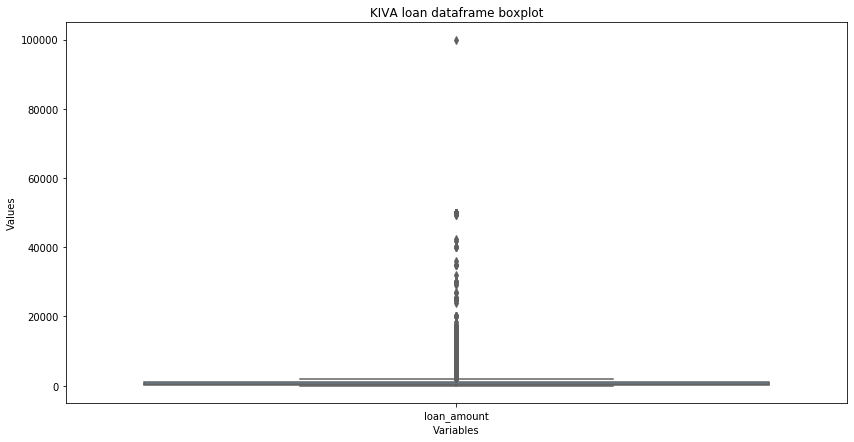

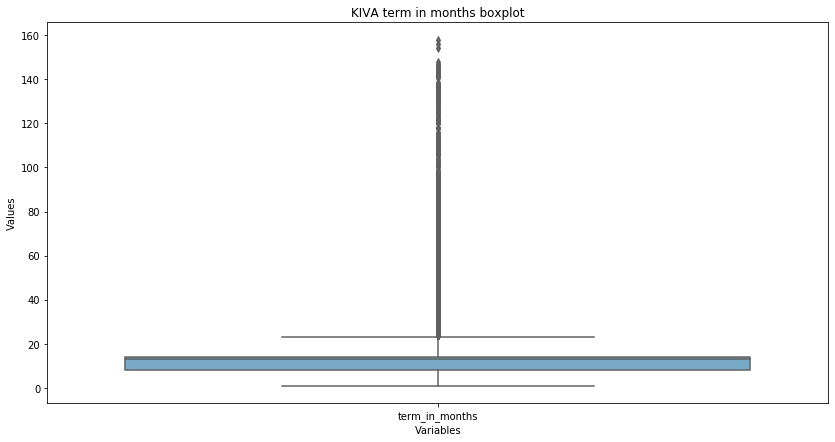

In [11]:
filt1 = ['loan_amount']
filt2 = ['term_in_months']
loans_filt1 = loans[filt1]
loans_filt2 = loans[filt2]

plt.figure(figsize=(14,7))
sns.boxplot(data = loans_filt1, palette = 'Blues')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('KIVA loan dataframe boxplot')
plt.show

plt.figure(figsize = (14, 7))
sns.boxplot(data = loans_filt2, palette = 'Blues')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('KIVA term in months boxplot')
plt.show

Notes:

Based on the boxplots above, we can observe that both loan amount and term in months variables are skewed to the left and have some outliers that might need attention.

**1. Number of Loans and Loan Amounts per Country**

Text(0.5, 1.0, 'Distribution of Kiva Loans by Country')

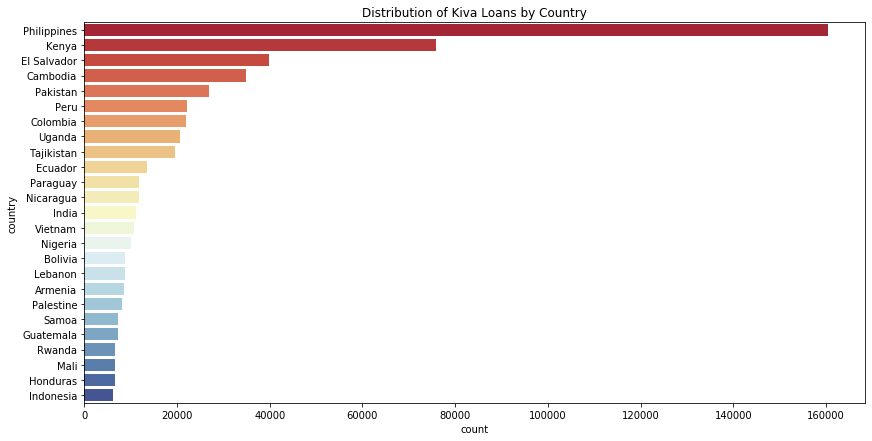

In [12]:
# Plot loans per country
plt.figure(figsize=(14,7))
sns.countplot(y="country", data=loans, palette = 'RdYlBu',
              order=loans.country.value_counts().iloc[:25].index).set_title("Distribution of Kiva Loans by Country")

Text(0.5, 1.0, 'Distribution of Kiva Loans by Region')

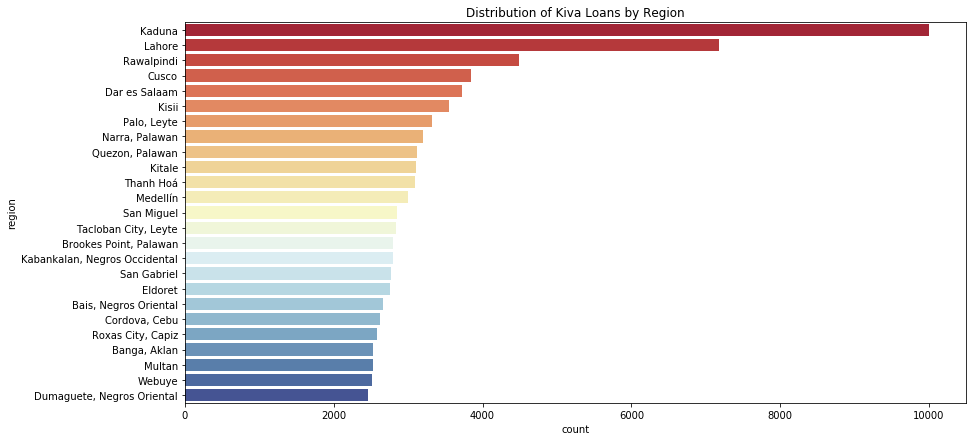

In [13]:
plt.figure(figsize=(14,7))
sns.countplot(y="region", data=loans, palette = 'RdYlBu',
              order=loans.region.value_counts().iloc[:25].index).set_title("Distribution of Kiva Loans by Region")

Notes:

The Philippines has the largest number of Kiva loan requests in terms of country, and Kaduna has the largest number of Kiva loan requests in terms of region.

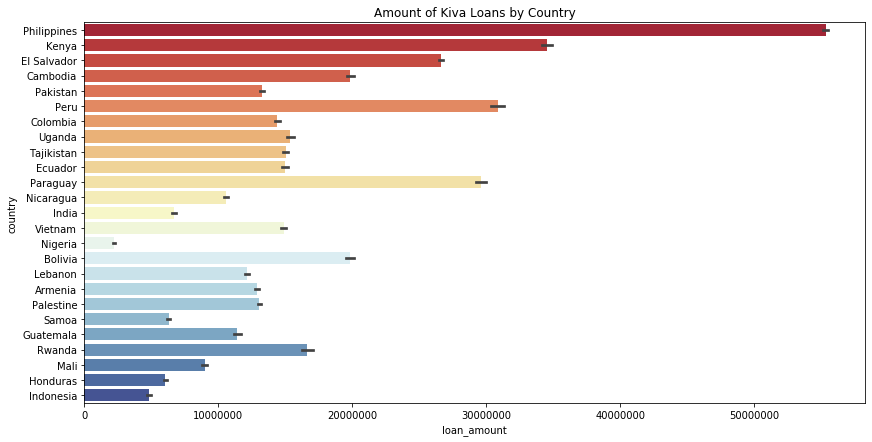

In [14]:
# Plot loans per country
plt.figure(figsize=(14,7))
sns.barplot(x = 'loan_amount', y='country', data=loans,
            estimator=sum, order=loans.country.value_counts().iloc[:25].index,
            palette = 'RdYlBu').set_title("Amount of Kiva Loans by Country")
sns.plotting_context("notebook", font_scale=1.1)
plt.ticklabel_format(style='plain', axis='x')

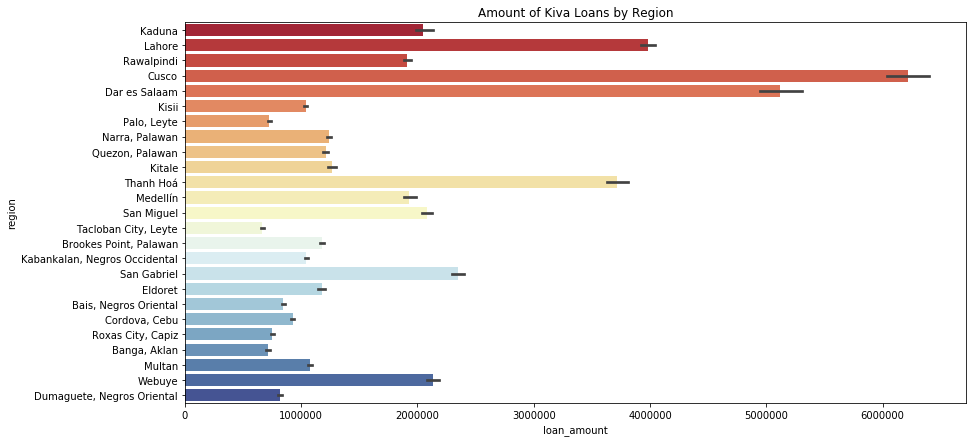

In [15]:
# Plot loans per region
plt.figure(figsize=(14,7))
sns.barplot(x = 'loan_amount', y='region', data=loans, palette = 'RdYlBu',
              estimator=sum, order=loans.region.value_counts().iloc[:25].index).set_title("Amount of Kiva Loans by Region")
sns.plotting_context("notebook", font_scale=1.1)
plt.ticklabel_format(style='plain', axis='x')

Notes:

The Philippines has the largest number of Kiva loan amount requests in terms of country, and Cusco has the largest number of Kiva loan amount requests in terms of region.

***Based on the barplots above, we can observe that Philippines has the largest number of Kiva loan requests and the largest number of Kiva loan amount requests. However, in order to get a clearer picture, we need to make adjustments by taking population size in account to get a per-capita distribution.***

#### Adjustements to account for Population Size

In [187]:
# Get loan_per_country data

# Extract id, country, and loan amount from loans dataframe
kiva_loan_country_df = loans[['id', 'country', 'loan_amount']]


# Organize new dataframe - group by country and aggregate new columns - SUM and COUNT
kiva_loan_country_df = kiva_loan_country_df.groupby(['country']).agg(
    {'loan_amount': ['sum','count']}).reset_index()

# droplevel() - This drops the header 'country' and 'loan_amount'
kiva_loan_country_df.columns = kiva_loan_country_df.columns.droplevel()

# Create new names for the columns
kiva_loan_country_df.columns = ['country', 'loan_amount', 'loan_count']



# Join world population data to kiva loan_per_country data
# note that we are using population data from the year 2016
kiva_loan_country_df = kiva_loan_country_df.merge(world_population[['Country', '2016']],
                                                  left_on=['country'], right_on=['Country'])
kiva_loan_country_df.drop('Country', axis=1, inplace=True)

# Calculate values per million population
kiva_loan_country_df['loans_per_mil'] = kiva_loan_country_df['loan_count'] / (kiva_loan_country_df['2016'] / 1000000)
kiva_loan_country_df['loan_amount_per_mil'] = kiva_loan_country_df['loan_amount'] / (kiva_loan_country_df['2016'] / 1000000)
display(kiva_loan_country_df)


,country,loan_amount,loan_count,2016,loans_per_mil,loan_amount_per_mil
0,Afghanistan,14000,2,34656032,0.057710,4.039701e+02
1,Albania,2666500,1934,2876101,672.438138,9.271232e+05
2,Armenia,12915400,8631,2924816,2950.954863,4.415799e+06
3,Azerbaijan,2888700,1945,9762274,199.236366,2.959044e+05
4,Belize,114025,125,366954,340.642151,3.107338e+05
...,...,...,...,...,...,...
70,Ukraine,1614200,963,45004645,21.397791,3.586741e+04
71,Vanuatu,9250,4,270402,14.792790,3.420833e+04
72,Vietnam,14891450,10843,92701100,116.967328,1.606394e+05
73,Zambia,1210675,784,16591390,47.253425,7.297008e+04


Text(0, 0.5, '')

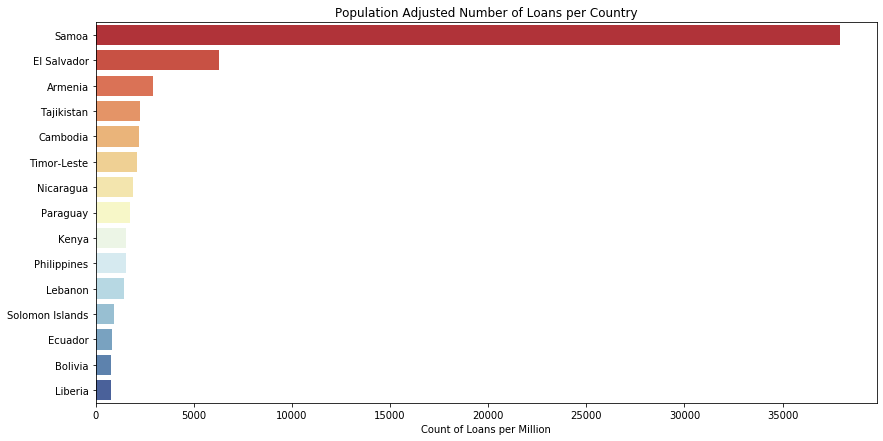

In [17]:
# Plot loans per million per country

plt.figure(figsize=(14,7))
kiva_loan_country_df.sort_values('loans_per_mil', ascending=False, inplace=True)
sns.barplot(kiva_loan_country_df.head(15).loans_per_mil, 
            kiva_loan_country_df.head(15).country,
            palette = 'RdYlBu').set_title("Population Adjusted Number of Loans per Country")
sns.plotting_context("notebook", font_scale=1.1)
plt.xlabel('Count of Loans per Million')
plt.ylabel('')


Text(0, 0.5, '')

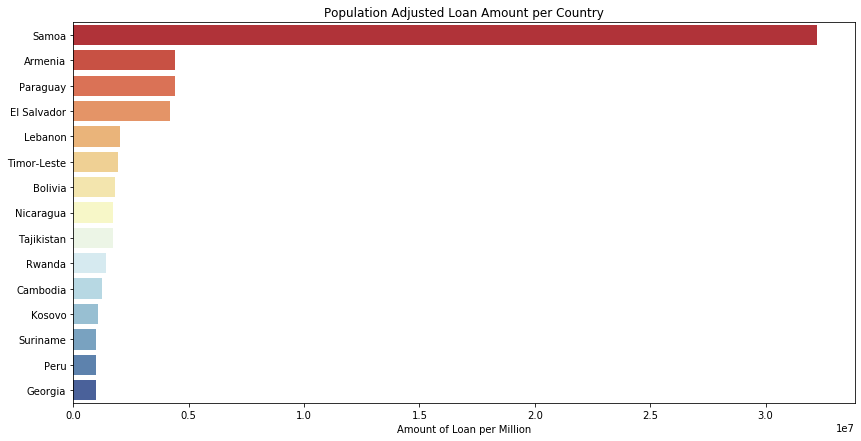

In [18]:
# Plot loan amount per million per country

plt.figure(figsize=(14,7))
kiva_loan_country_df.sort_values('loan_amount_per_mil', ascending=False, inplace=True)
sns.barplot(kiva_loan_country_df.head(15).loan_amount_per_mil, 
            kiva_loan_country_df.head(15).country,
            palette = 'RdYlBu').set_title("Population Adjusted Loan Amount per Country")
sns.plotting_context("notebook", font_scale=1.2)
plt.xlabel('Amount of Loan per Million')
plt.ylabel('')

- After adjusting the loan count and total amount of loan to account for population size, Samoa has the largest relative number and amount of loans. 
- However, it is important to note that Samoa has the largest relative number because of its small population number.
- El Salvador, with a population of 6.3 million has the second highest adjusted number of loans and total loan amount.
- The Philippines, with 103.3 million people is now the 10th highest in adjusted number of loans and total loan amount.

**2. Loans per sector**


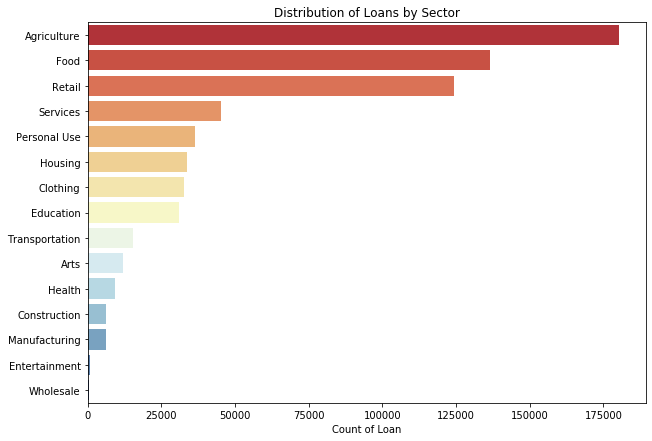

In [200]:
# Count of loans per sector
plt.figure(figsize = (10, 7))
sns.countplot(y = 'sector', data = loans, palette = 'RdYlBu',
              order = loans.sector.value_counts().iloc[:20].index).set_title('Distribution of Loans by Sector')
sns.plotting_context('notebook', font_scale = 1.2)
plt.xlabel('Count of Loan')
plt.ylabel('')

plt.savefig('loan_sector.png')



Agriculture tops the list of loan requests by sector, followed by Food and Retail.


Text(0, 0.5, '')

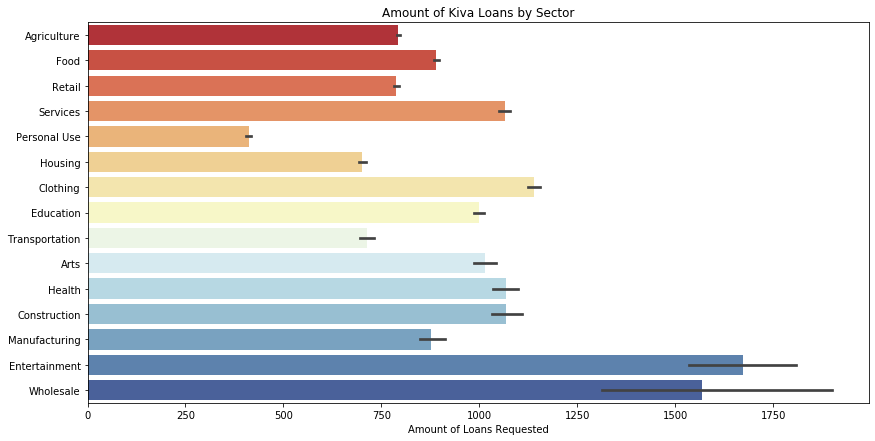

In [20]:
plt.figure(figsize = (14, 7))
result = loans.groupby(["sector"])['loan_amount'].sum().reset_index().sort_values('loan_amount')
sns.barplot(x = 'loan_amount', y='sector', data=loans, order=loans.sector.value_counts().iloc[:20].index,
            palette = 'RdYlBu').set_title("Amount of Kiva Loans by Sector")
sns.plotting_context('notebook', font_scale = 1.2)
plt.xlabel('Amount of Loans Requested')
plt.ylabel('')

When it comes to Kiva loan amounts, entertainment and wholesale sectors are on top.

**3. Loans amount distribution**

Next, we will look into the distribution of loan amount.

Text(0, 0.5, 'Number of Loans')

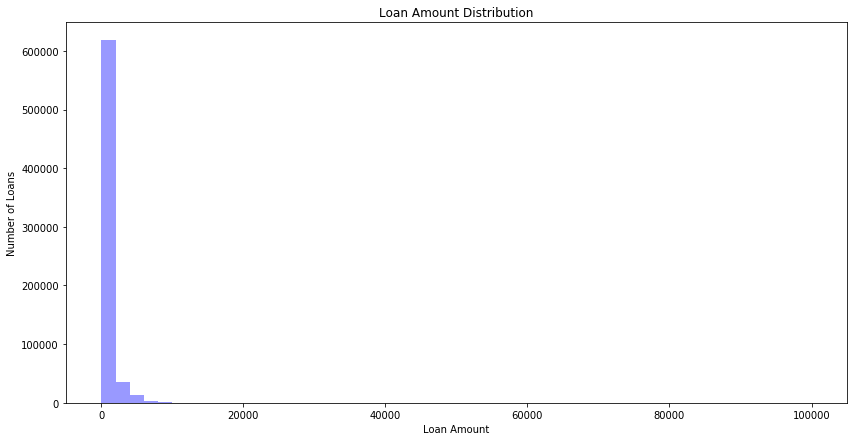

In [21]:
# Plot loan amount histogram
plt.figure(figsize=(14,7))
sns.distplot(loans.loan_amount.values, color = "blue", kde=False)
plt.title("Loan Amount Distribution")
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans')



Because of the outliers we observed in the boxplot, we are unable to see a clear distribution. Hence, we will remove the outliers. 

In [22]:
# Truncate outliers
percentile_99 = np.percentile(loans.loan_amount.values, 99)
loans['loan_amount_trunc'] = loans['loan_amount'].copy()
loans.loc[loans['loan_amount_trunc'] > percentile_99, 'loan_amount_trunc'] = percentile_99





Text(0, 0.5, 'Number of Loans')

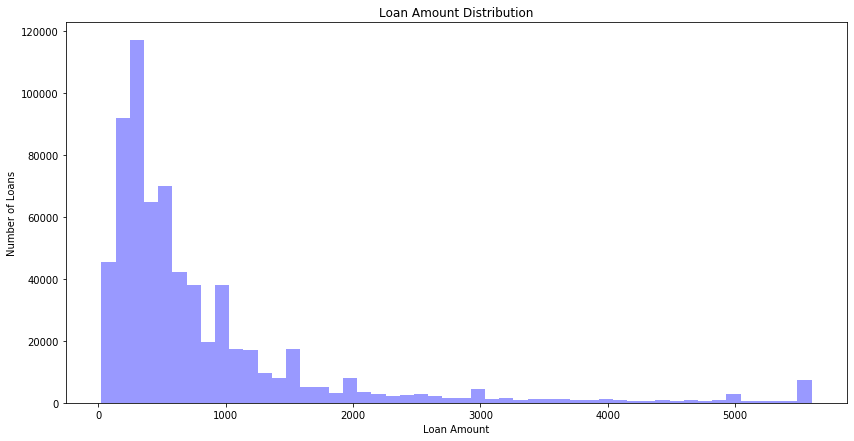

In [23]:
# Plot loan amount histogram (without outliers)
plt.figure(figsize=(14,7))
sns.distplot(loans.loan_amount_trunc.values, color = "blue", kde=False)
plt.title("Loan Amount Distribution")
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans')

Text(0, 0.5, 'Number of Loans')

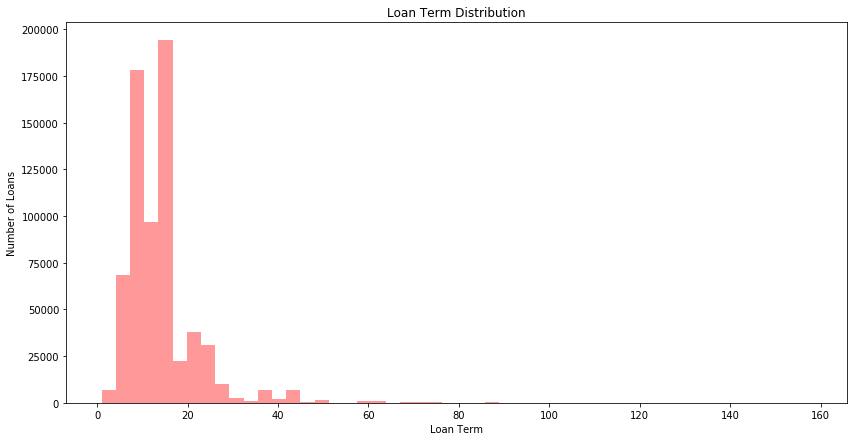

In [24]:
# Plot repayent term histogram
plt.figure(figsize=(14,7))
sns.distplot(loans.term_in_months.values, color = 'red', kde=False)
plt.title("Loan Term Distribution")
plt.xlabel('Loan Term')
plt.ylabel('Number of Loans')


In terms of loan amount, the distribution is skewed to the left, meaning that most of the loan amounts were not that expensive. In terms of loan term, the distribution is also skewed to the left, indicating that many of the loan terms were short in period.

**4. Borrower's Gender**

Next, we will take a look into the borrower's gender variable to specifically see which gender is borrowing Kiva's loan.


/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


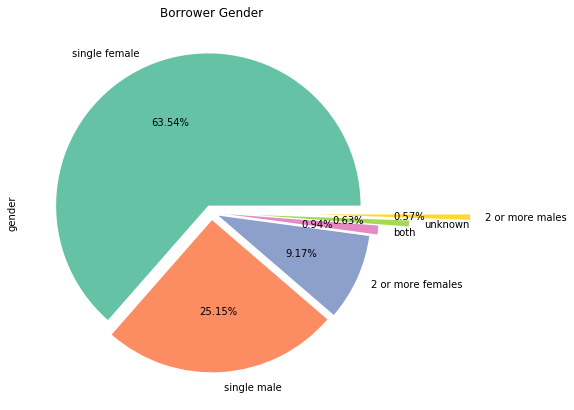

In [195]:
# Parse borrower_genders variable

# Because the variable includes {female}, {male}, {female,female}, {male,male}, we need to split the strings
# set() method is used to convert any of the iterable to sequence of iterable elements with dintinct elements, commonly called Set.
# Convert them into list
# The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) 
# characters (space is the default leading character to remove)

def parse_genders(borrower_genders):
    gender_list = borrower_genders.split(",")
    gender_list = list(set(gender_list))
    gender_list = [borrower_genders.strip() for borrower_genders in gender_list]
    if len(gender_list)==2:
        if 'female' in gender_list and 'male' in gender_list:
            return "both"
        elif 'female' in gender_list:
            return "2 or more females"
        elif 'male' in gender_list:
            return "2 or more males"
    elif gender_list[0]=="female":
        return "single female"
    elif gender_list[0]=="male":
        return "single male"
    else:
        return "unknown"

# Plot loans by borrower gender
with sns.color_palette("Set2", 8):
    plt.figure(figsize=(10,7))
    plt.title("Borrower Gender")
    loans.borrower_genders[loans.borrower_genders.isnull()]= 'unknown'
    loans['gender'] = loans.borrower_genders.apply(parse_genders)
    loans.gender.value_counts().plot.pie(labeldistance=1.1, autopct='%1.2f%%',
                                         explode = (0.05, 0.05, 0.05, 0.1, 0.3, 0.7))
plt.savefig('borrower_gender.png')

There are a lot more female borrowers than male borrowers.  In addition, for loans with multiple borrowers, there are a lot more female only borrower groups than mixed or male only borrower groups.


**5. Repayment Interval**

Next, we will look into repayment intervals.


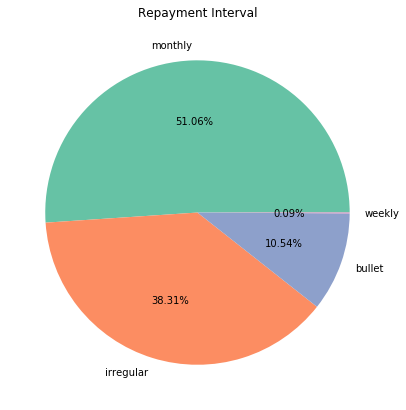

In [196]:
# Pie Chart for Repayment Interval

with sns.color_palette("Set2", 4):
    plt.figure(figsize=(7,7))
    plt.title("Repayment Interval")
    loans.repayment_interval.value_counts().T.plot.pie(labeldistance=1.1,autopct='%1.2f%%')
    plt.ylabel('')

plt.savefig('repayment_interval.png')
    

The pie chart indicates that most of the loans are paid monthly or irregularly.

**6. Loan theme type**


Text(0.5, 0, 'Count of Loan Theme Types')

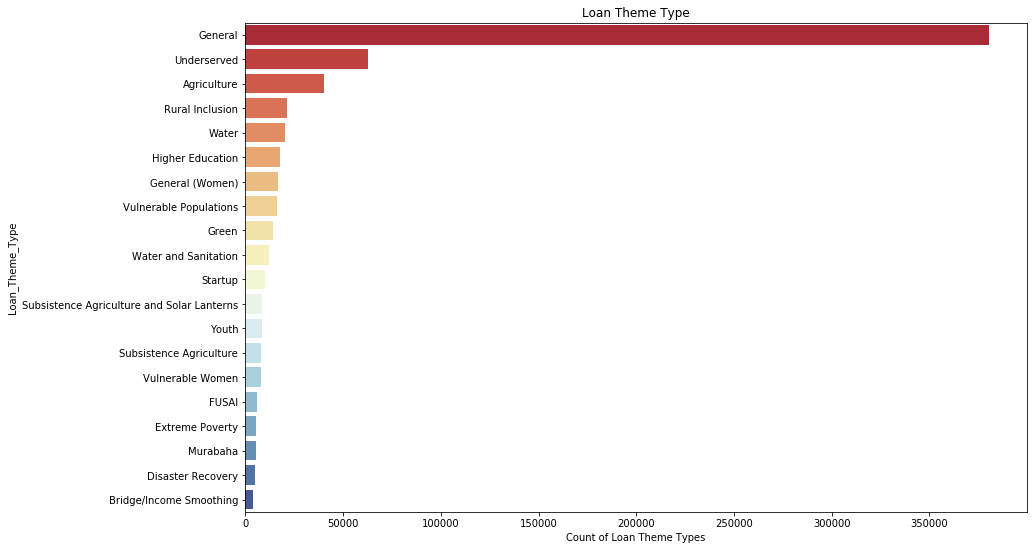

In [27]:
plt.figure(figsize = (14, 9))
sns.countplot(y = 'Loan_Theme_Type', data = loan_theme, palette = 'RdYlBu',
              order = loan_theme.Loan_Theme_Type.value_counts().iloc[:20].index).set_title('Loan Theme Type')
sns.plotting_context('notebook', font_scale = 1.2)
plt.xlabel('Count of Loan Theme Types')

Text(0, 0.5, '')

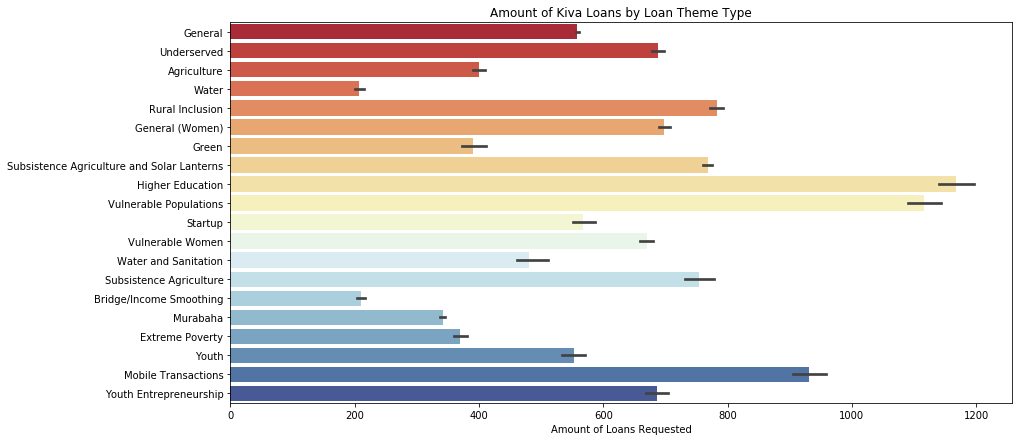

In [28]:
plt.figure(figsize = (14, 7))
sns.barplot(x = 'loan_amount', y='loan_theme_type', data = kiva_all,
            order = kiva_all.loan_theme_type.value_counts().iloc[:20].index,
            palette = 'RdYlBu').set_title("Amount of Kiva Loans by Loan Theme Type")
sns.plotting_context('notebook', font_scale = 1.2)
plt.xlabel('Amount of Loans Requested')
plt.ylabel('')

Based on the number of loan requests, we can observe that the general use of loans were requested the most. However, when we look into the amount of kiva loans by loan theme type, subsistence agriculture, solar lanterns, higher educations and vulnerable popualtions are on top. 

**7. MPI Multi Dimensional Poverty Index**

MPI, or multi-dimensional poverty index, use a range of indicators to calculate a poverty figure for a given population, in which a small figure indicates lower poverty level and a large figure indicates a higher poverty level. The index idenfites deprivations across three dimensions as the Human Development Index (HDI) and represents the level and number of people who are multidimensionally poor. The three dimensions that represents the level of poverty are health, education, and standard of living. These three dimensions are are further divided into the following sub categories to understand how people experience in multiple and simultaneous ways: nutrition, child mortality, years of schooling, school attendance, cooking fuel, sanitation, drinking water, drinking water, housing, and assets.


**Nutrition:** An adult under 70 years of age or a child is undernourished.

**Child mortality:** Any child under the age of 18 years has died in the five years preceding the survey.	

**Years of schooling:** No household member aged 10 years or older has completed six years of schooling.

**School attendance:** Any school-aged child is not attending school up to the age at which he/she would complete class 8.

**Cooking fuel:** The household cooks with dung, wood, charcoal or coal.

**Sanitation:** The household’s sanitation facility is not improved (according to SDG guidelines) or it is improved but shared with other households.	

**Drinking water:** The household does not have access to improved drinking water (according to SDG guidelines) or safe drinking water is at least a 30-minute walk from home, round trip.

**Electricity:** The household has no electricity.

**Housing:** Housing materials for at least one of roof, walls and floor are inadequate: the floor is of natural materials and/or the roof and/or walls are of natural or rudimentary materials.

**Assets:** The household does not own more than one of these assets: radio, TV, telephone, computer, animal cart, bicycle, motorbike or refrigerator, and does not own a car or truck.	


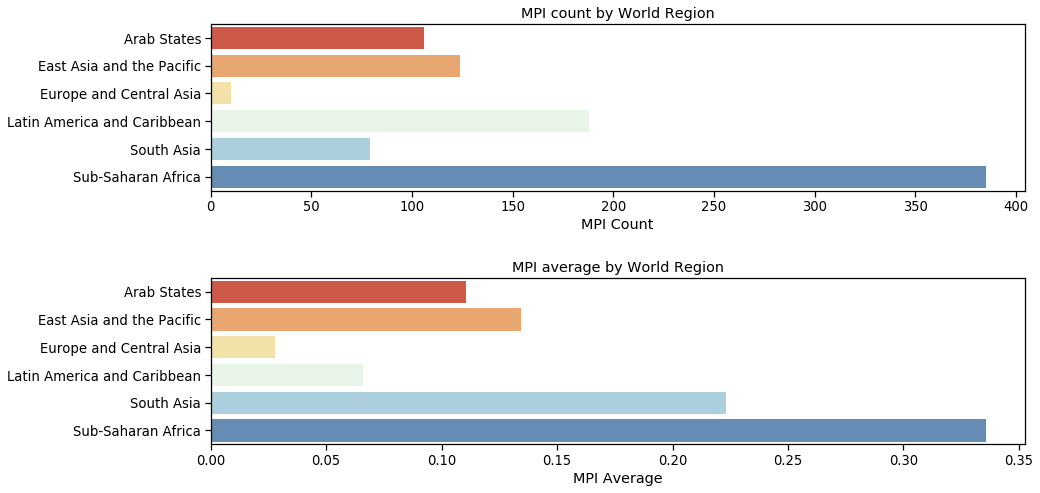

In [29]:
# Plot MPI by World Region

with sns.color_palette("RdYlBu", 6), sns.plotting_context("notebook", font_scale=1.2):
    plt.figure(figsize=(15,7))
    plt.subplot(2,1,1).set_title("MPI count by World Region")
    world_region_mpi_count_df = mpi_regions_new.groupby(['world_region'])['MPI'].count().reset_index(name='count_mpi')
    a = sns.barplot(world_region_mpi_count_df.count_mpi, world_region_mpi_count_df.world_region)
    plt.ylabel('')
    plt.xlabel('MPI Count')

    plt.subplot(2,1,2).set_title("MPI average by World Region")
    world_region_mpi_mean_df = mpi_regions_new.groupby(['world_region'])['MPI'].mean().reset_index(name='mean_mpi')
    b = sns.barplot(world_region_mpi_mean_df.mean_mpi, world_region_mpi_mean_df.world_region)
    plt.ylabel('')
    plt.xlabel('MPI Average')
    
    plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=2.0, rect=[0, 0, 0.95, 0.95])
    
    

When we look at the above MPI average by World Region barplot, we can observe that Sub-Saharan Africa has the highest MPI average number. This indicates that Sub-Saharan African regions are experiencing poverty in multiple and simultaneous ways. 

### 5. Exploratory Analysis Part 2

**A. Total Loan Requested VS National MPI**

**B. Total Loan Amount Requested VS National MPI**

**C. Total Loan Amount Requested VS Regional MPI**

**D. Total Loan Amount Requested VS Regional MPI**

**E. Percentage funded vs Regional MPI**

**F. Lender's Data**

**G. Average MPI per Sector**

**H. Average MPI per Activity**

**I. MPI in Rural and Urban areas - Country**

**J. Intensity of Deprivation in Rural and Urban areas - Country**


Based on the variables we explored above, we will now explore poverty and how Kiva loans are being used by conducting several inferential statistics.

**A. Total Loan Requested VS National MPI**

,country,total_number_loans,MPI
0,Afghanistan,2,0.437000
1,Belize,70,0.038586
2,Benin,1,0.351000
3,Bhutan,1,0.016000
4,Brazil,13,0.011000


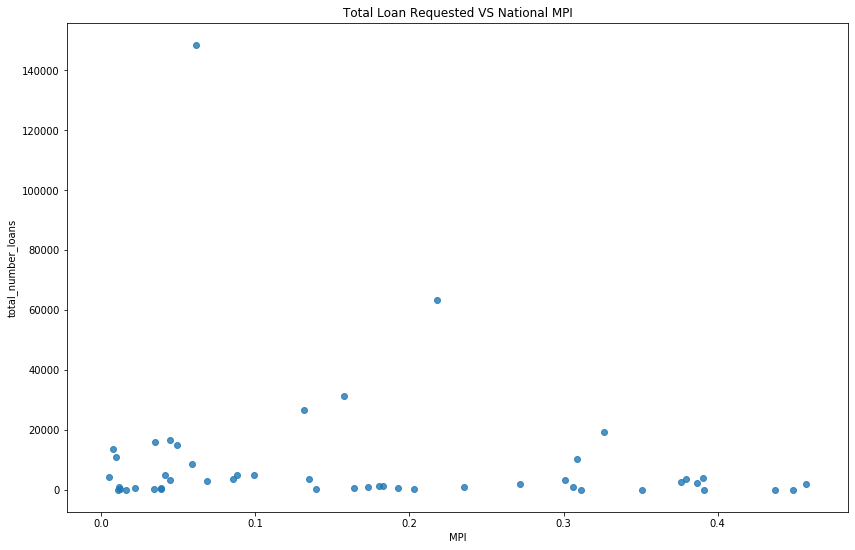

In [30]:
# Scatter plot of number of loans per MPI by country
total_loans_by_country = kiva_all.groupby(['country'])['loan_amount'].count().reset_index(
    name='total_number_loans')

MPI_by_country = kiva_all.groupby(['country'])['MPI'].mean().reset_index()

loans_mpi_by_country = pd.merge(total_loans_by_country, MPI_by_country,
                                how = 'left', on = 'country')

display(loans_mpi_by_country.head(5))

plt.figure(figsize = (14,9))
sns.regplot(x = loans_mpi_by_country.MPI, y = loans_mpi_by_country.total_number_loans, fit_reg = False)
plt.title('Total Loan Requested VS National MPI')
plt.show()

Based on the scatterplot above, we dont see a clear relationship between the total number of loan requested and national MPI number. We do see an outlier in which one particular country with a low MPI number has requested an excessive number of loans.

**B. Total Loan Amount Requested VS National MPI**

,country,total_loan_amount,MPI
0,Afghanistan,14000,0.437000
1,Belize,44850,0.038586
2,Benin,50000,0.351000
3,Bhutan,10000,0.016000
4,Brazil,13550,0.011000


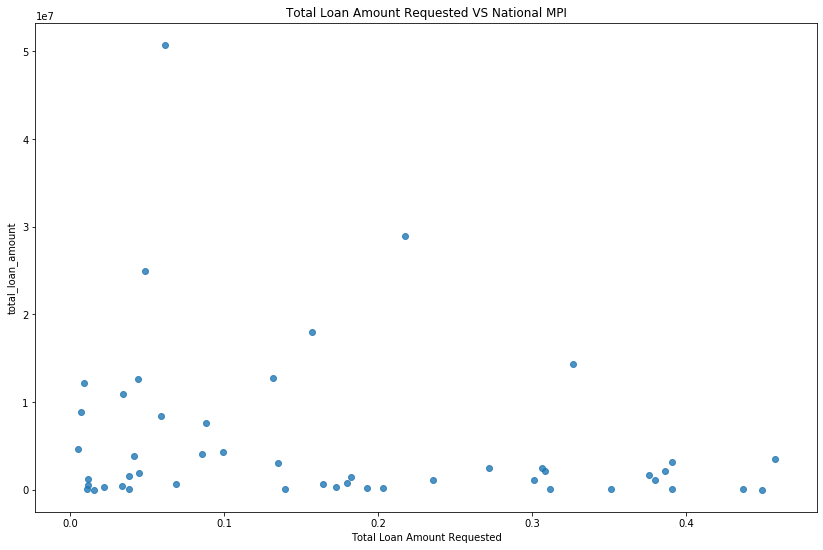

In [31]:
# Scatter plot of loan amount per MPI by country
total_loan_amount_by_country = kiva_all.groupby(['country'])['loan_amount'].sum().reset_index(
    name='total_loan_amount')

MPI_by_country = kiva_all.groupby(['country'])['MPI'].mean().reset_index()

loans_amount_mpi_by_country = pd.merge(total_loan_amount_by_country, MPI_by_country,
                                how = 'left', on = 'country')

display(loans_amount_mpi_by_country.head(5))

plt.figure(figsize = (14,9))
sns.regplot(x = loans_amount_mpi_by_country.MPI, y = loans_amount_mpi_by_country.total_loan_amount, fit_reg = False)
plt.title('Total Loan Amount Requested VS National MPI')
plt.xlabel('Total Loan Amount Requested')
plt.show()

Again, based on the scatterplot above, we dont see a clear relationship between the total loan amount requested and national MPI number. We do see an outlier in which one particular country with a low MPI number has requested an excessive amount of loans.

**C. Total Loan Amount Requested VS Regional MPI**

So far we have looked at the relationship between A) total number of loan requested and MPI; B) loan amount requested and MPI at a national level. This time, we will look at these relationsihp at a regional level to understand the relationship from a different perspective.

,country,region,MPI,total_number_loans
0,Afghanistan,Kandahar City,0.437,2
1,Belize,Crique Jute,0.019,1
2,Belize,Maya Mopan,0.013,7
3,Belize,Red Bank,0.013,6
4,Belize,San Antonio,0.019,9
...,...,...,...,...
4549,Zimbabwe,Shurugwi,0.174,121
4550,Zimbabwe,Umguza,0.014,54
4551,Zimbabwe,Umzingwane,0.014,44
4552,Zimbabwe,mwenezi,0.164,106


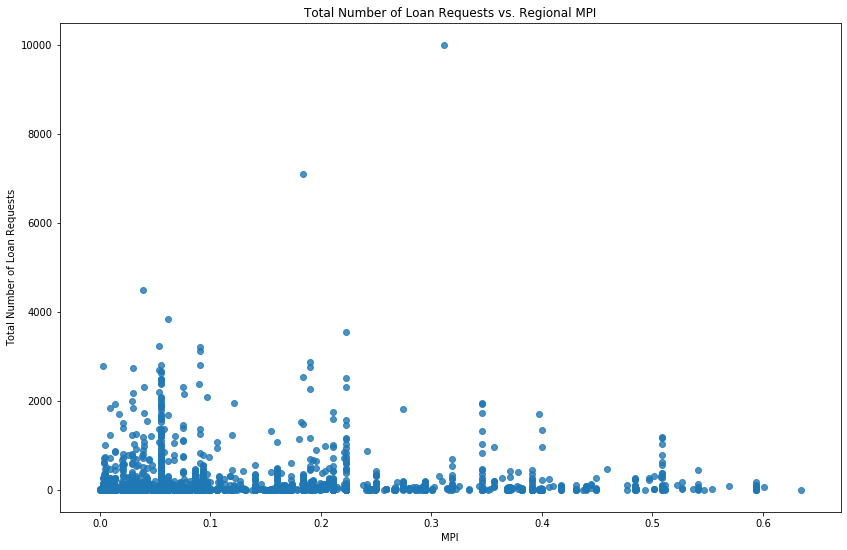

In [32]:
# Scatter plot of number of loans per MPI
total_loans_mpi = kiva_all.groupby(['country','region','MPI'])['loan_amount'].count().reset_index(name='total_number_loans')
display(total_loans_mpi)
plt.figure(figsize = (14,9))
sns.regplot(x = total_loans_mpi.MPI, y = total_loans_mpi.total_number_loans, fit_reg=False)
plt.title("Total Number of Loan Requests vs. Regional MPI")
plt.ylabel('Total Number of Loan Requests')
plt.show()

In [33]:
# Examine outliers
percentile_95_df = total_loans_mpi[total_loans_mpi.total_number_loans > total_loans_mpi.total_number_loans.quantile(.95)]
percentile_95_df.sort_values('total_number_loans', ascending=False).head(2)

,country,region,MPI,total_number_loans
1555,Nigeria,Kaduna,0.311,10000
1627,Pakistan,Lahore,0.184,7099


Based on the scatterplot, the total number of loan requests to Kiva seems to be higher in the regions witha lower MPI. 
This means that regions that are experiencing less poverty are actually requesting more loans than the countries that are experiencing greater poverty level. Also note that there are outliers (Kaduna from Nigeria and Lahore from Pakistan) that have high total number of requests. 

**D. Total Loan Amount Requested VS Regional MPI**


,country,region,MPI,total_loan_amount
0,Afghanistan,Kandahar City,0.437,14000
1,Belize,Crique Jute,0.019,525
2,Belize,Maya Mopan,0.013,3225
3,Belize,Red Bank,0.013,4975
4,Belize,San Antonio,0.019,4025
...,...,...,...,...
4549,Zimbabwe,Shurugwi,0.174,71500
4550,Zimbabwe,Umguza,0.014,31000
4551,Zimbabwe,Umzingwane,0.014,24000
4552,Zimbabwe,mwenezi,0.164,57500


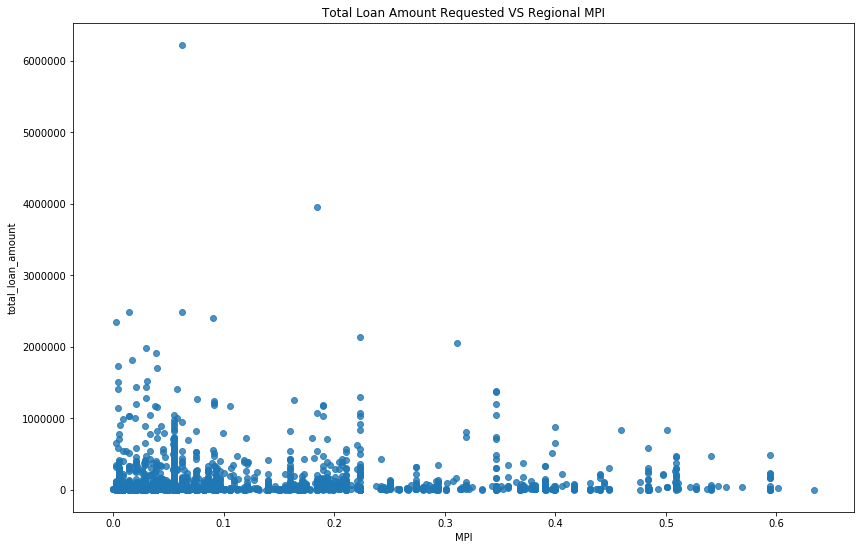

In [34]:
# Scatter plot of total loan amount per MPI 
total_loan_amount_df = kiva_all.groupby(['country', 'region', 'MPI'])['loan_amount'].sum().reset_index( 
     name = 'total_loan_amount') 
display(total_loan_amount_df) 
 
# plot the above table 
plt.figure(figsize = (14,9)) 
sns.regplot(x = total_loan_amount_df.MPI, y = total_loan_amount_df.total_loan_amount, fit_reg = False) 
plt.title('Total Loan Amount Requested VS Regional MPI') 
plt.show() 

In [36]:
# Examine outliers
percentile_95_df = total_loan_amount_df[total_loan_amount_df.total_loan_amount > 
                                        total_loan_amount_df.total_loan_amount.quantile(.95)]
percentile_95_df.sort_values('total_loan_amount', ascending=False).head(2)

,country,region,MPI,total_loan_amount
1746,Peru,Cusco,0.062,6222075
1627,Pakistan,Lahore,0.184,3956300


Based on the scatterplot above, the total loan amount to Kiva seems to be higher in the regions witha lower MPI. Again, this means that regions that are experiencing less poverty are actually requesting more loan amount than the countries that are experiencing greater poverty level. Also not that there are outliers (Cusco from Peru and Lahore from Pakistan) that have high total loan amount. 

By looking at the two scatterplots that explored the relationship between loan amount/number of loan request and regional MPI, we can identify a trend in which countries with higher MPI are requesting more loans. One would expect the opposite where countries with higher MPI would be requesting more loans. Two possible explanation for this unexpected result may be that 1. The higher MPI the region has, the ability of these people to even request loans through Kiva's loan progream decreases due to lack of knowledge about loans or application process; and 2. Kiva's loan outreach is not working due accessibility and so on. 



**E. Percentage funded vs Regional MPI**

So far, we have looked at the total number of loan requested and the total amount of loans requested. This part will see how much of these requests are being satisfied through Kiva's loan program by using the funded_amount variable. We will specifically create a new variable - funded_percentage by calculating the following: (total_funded_amount / total_loan amount) * 100. 




,country,region,MPI,total_loan_amount,total_funded_amount,funded_percentage
0,Afghanistan,Kandahar City,0.437,14000,14000,100.0
1,Belize,Crique Jute,0.019,525,525,100.0
2,Belize,Maya Mopan,0.013,3225,3225,100.0
3,Belize,Red Bank,0.013,4975,4975,100.0
4,Belize,San Antonio,0.019,4025,4025,100.0
...,...,...,...,...,...,...
4549,Zimbabwe,Shurugwi,0.174,71500,71500,100.0
4550,Zimbabwe,Umguza,0.014,31000,31000,100.0
4551,Zimbabwe,Umzingwane,0.014,24000,24000,100.0
4552,Zimbabwe,mwenezi,0.164,57500,57500,100.0


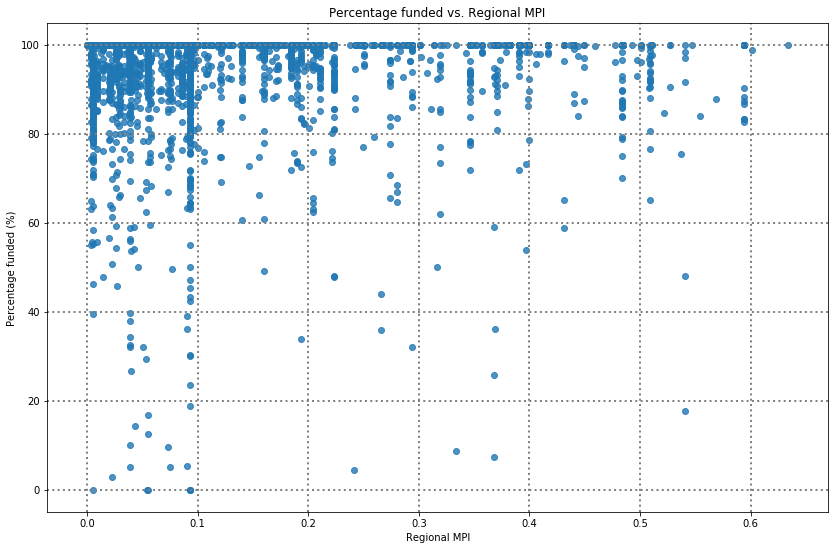

In [37]:
funded_amount_df = kiva_all.groupby(['country','region','MPI'])['funded_amount'].sum().reset_index(
    name = 'total_funded_amount') 
funded_percentage_df = pd.merge(total_loan_amount_df, funded_amount_df, how = 'left')  
# Using apply function, create a new column  
funded_percentage_df['funded_percentage'] = funded_percentage_df.apply(lambda row: 
                                                                      (row.total_funded_amount / row.total_loan_amount) 
                                                                        * 100, axis = 1) 
display(funded_percentage_df)  
# Plot the above information 
plt.figure(figsize = (14, 9)) 
sns.regplot(x = funded_percentage_df.MPI, y = funded_percentage_df.funded_percentage, fit_reg = False) 
plt.title("Percentage funded vs. Regional MPI") 
plt.ylabel('Percentage funded (%)') 
plt.xlabel('Regional MPI') 
plt.grid(color='gray', linestyle=':', linewidth=2) 
plt.show() 

**Total Loan and Funded Amount by Year-Month**


Text(0.5, 1.0, 'Loan and Funded Amount by Year-Month')

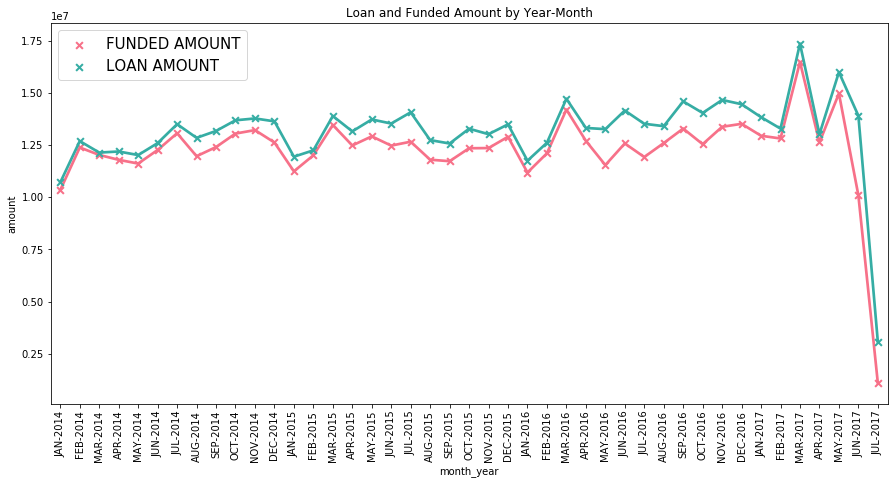

In [112]:
# Total Loan and Funded Amount throughout the years by Year-Month
monthyear_funded =loans.groupby("month_year")[["funded_amount"]].sum().reset_index()
monthyear_loan   =loans.groupby("month_year")[["loan_amount"]].sum().reset_index()
monthyear_funded["type"] = "FUNDED AMOUNT"
monthyear_loan["type"]   = "LOAN AMOUNT"
monthyear_funded = monthyear_funded.rename(columns={"funded_amount":"amount"})
monthyear_loan   = monthyear_loan.rename(columns={"loan_amount":"amount"})
monthyear_lf = pd.concat([monthyear_funded,monthyear_loan],axis=0)

order = loans["month_year"].unique()
plt.figure(figsize=(15,7))
sns.pointplot("month_year","amount",data = monthyear_lf,order = order,hue = "type",
              palette = 'husl', markers="x", linewidth=2)
sns.plotting_context("notebook", font_scale=1.2)
plt.xticks(rotation=90)
plt.legend(loc="best",prop = {"size":15})
plt.title("Loan and Funded Amount by Year-Month")

Based on the graph above, we can see that loans are being requested less on Januarys. Other than that, the loans being requested and being funded are evenly distributed throughout the years. 

Based on the graph above, we can see that most of the loans are being funded. 

Text(0.5, 1.0, 'Yearly Funded Amount and Loan Amount')

<Figure size 1080x504 with 0 Axes>

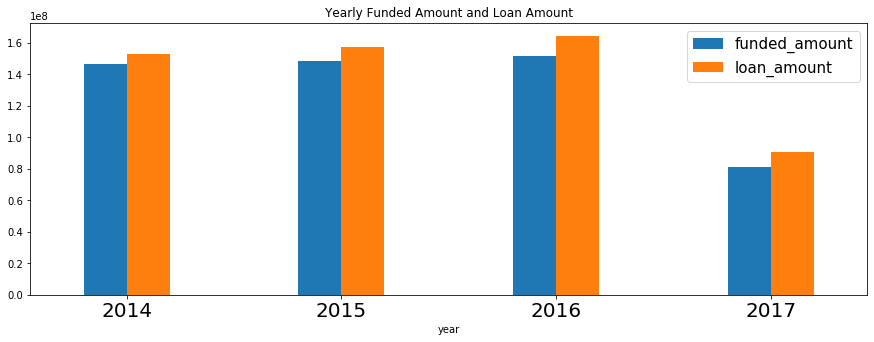

In [119]:
# Barplot on loan and funded amount by years
plt.figure(figsize=(15,7))
sns.plotting_context("notebook", font_scale=1.2)
yearly_lf = loans.groupby("year")[["funded_amount","loan_amount"]].sum()
yearly_lf.plot(kind = "bar",figsize=(15,5),width=.4)
plt.xticks(rotation = 0,fontsize = 20)
fig.set_facecolor("white")
plt.legend(loc="best",prop = {"size":15})
plt.title("Yearly Funded Amount and Loan Amount")

**F. Lender's Data**

Text(0.5, 1.0, 'Total Number of Lenders by Different Months of Years')

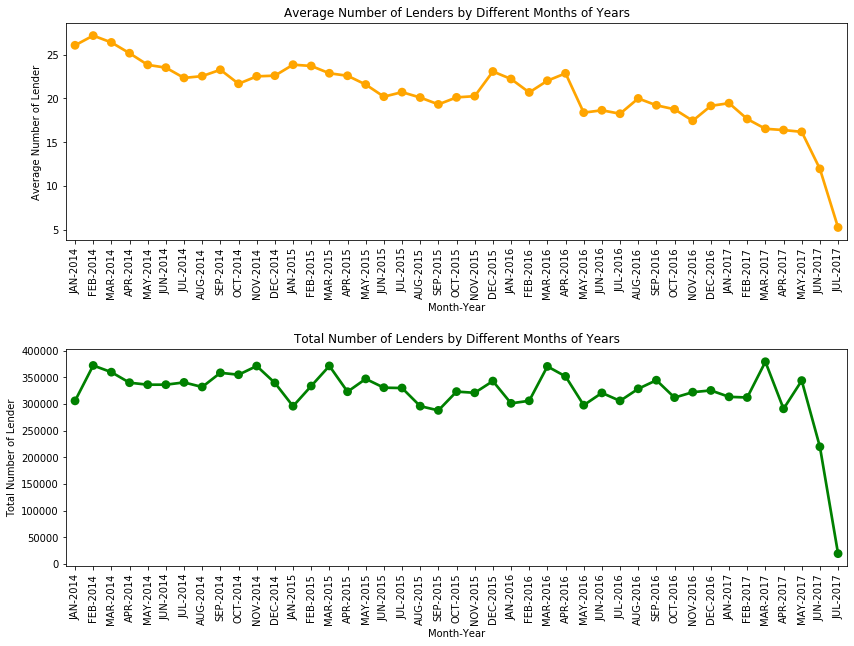

In [125]:
order = loans["month_year"].unique()
lend_my = loans.groupby("month_year")["lender_count"].mean().reset_index()
lend_my1 = loans.groupby("month_year")["lender_count"].sum().reset_index()
fig = plt.figure(figsize=(14,10))
plt.subplot(211)
sns.pointplot(lend_my["month_year"],lend_my["lender_count"],order=order,color="orange")
plt.xticks(rotation =90)
plt.ylabel('Average Number of Lender')
plt.xlabel('Month-Year')
plt.title("Average Number of Lenders by Different Months of Years")

plt.subplot(212)
sns.pointplot(lend_my1["month_year"],lend_my1["lender_count"],order=order,color="green")
plt.xticks(rotation =90)
plt.subplots_adjust(hspace = .5)
plt.ylabel('Total Number of Lender')
plt.xlabel('Month-Year')
plt.title("Total Number of Lenders by Different Months of Years")

**G. Average MPI per Sector**

This time we will see how Average MPI differs based on sectors

,sector,mean_mpi
10,Personal Use,0.171292
14,Wholesale,0.167263
0,Agriculture,0.144634
3,Construction,0.136059
2,Clothing,0.131636


Text(0.5, 1.0, 'Average MPI per Sector')

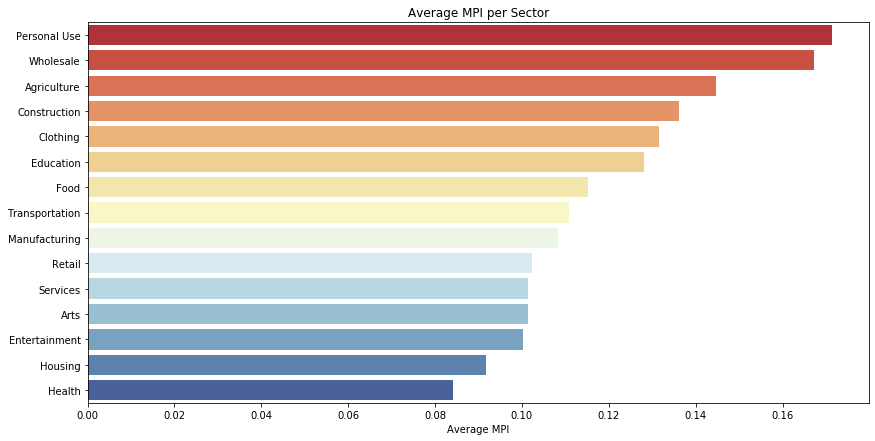

In [38]:
# Plot MPI per sector
kiva_sector_mpi = kiva_all.groupby(['sector'])['MPI'].mean().reset_index(name='mean_mpi')
kiva_sector_mpi.sort_values(['mean_mpi'], ascending=False, inplace=True)
display(kiva_sector_mpi.head(5))

# Plot barplot
plt.figure(figsize=(14,7))
sns.barplot(x='mean_mpi', y='sector', data=kiva_sector_mpi, palette = "RdYlBu")
sns.plotting_context("notebook", font_scale=1.2)
plt.ylabel('')
plt.xlabel('Average MPI')
plt.title("Average MPI per Sector")


Personal use of loans have the highest average MPI, which is interesting as one would expect that sectors such as health, food, or housing would have had a higher average MPI as they are basic necessities for life. This result might indicate that when people who request/apply for Kiva loans already have the basic necessities satisfied and are trying to use Kiva loan program to further better their lives. In order to see a clearer picture of this phenomenon, we will use the variable 'use' to see where Kiva loan borrowers are using their loans. 

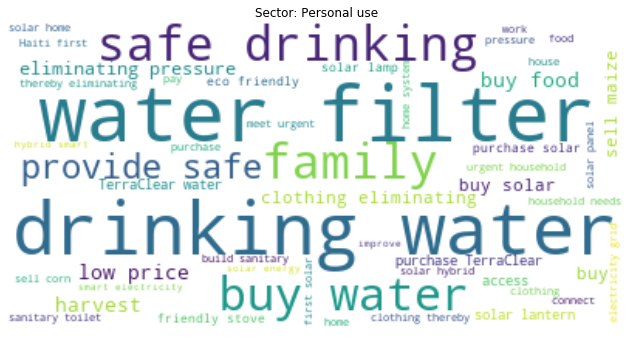

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [203]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


# Plot word clouds

wc = WordCloud(background_color='white', stopwords=STOPWORDS,max_words=50,
               contour_color='firebrick').generate(
               " ".join(kiva_all.loc[kiva_all['sector'] == 'Personal Use'].use.astype(str)))
plt.imshow(wc, interpolation='bilinear')
plt.title('Sector: Personal use')
plt.axis('off')
plt.tight_layout(pad=0.4, w_pad=0.0, h_pad=2.0, rect=[0, 0, 1.45, 1.45])
plt.figure(figsize=(10,10))
plt.show()

plt.savefig('method.jpg')

As we can see from the wordcloud, people were borrowing Kiva Loans that were related to either basic necessities such as drinking water, water filter and safe drinking or safety matters. 

**H. Average MPI per Activity**


Text(0.5, 1.0, 'Average MPI per Activity')

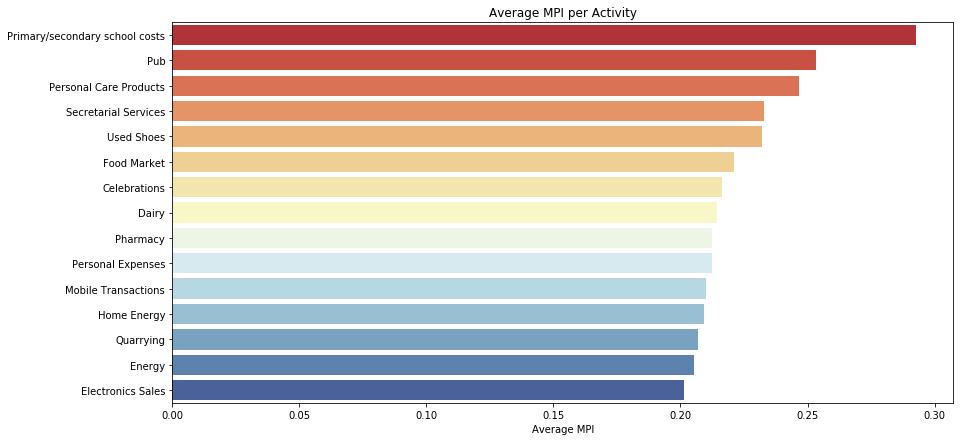

In [59]:
# New dataframe for activity vs mpi
kiva_activity_mpi = kiva_all.groupby(['activity'])['MPI'].mean().reset_index(name='mean_mpi')
kiva_activity_mpi = kiva_activity_mpi.sort_values(by=['mean_mpi'], ascending=False).head(15)



# Plot the above dataframe
plt.figure(figsize=(14,7))
sns.barplot(x = 'mean_mpi', y = 'activity', data=kiva_activity_mpi, palette = "RdYlBu")
sns.plotting_context("notebook", font_scale=1.2)
plt.ylabel('')
plt.xlabel('Average MPI')
plt.title("Average MPI per Activity")

**I. MPI in Rural and Urban areas - Country**


Firstly we have MPI already broken down by country, split into urban MPI and rural MPI. We also have MPI split into its components - headcount ratio and intensity.

,ISO,country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
96,NER,Niger,0.276,53.9,51.2,0.669,96.19,69.5
99,SOM,Somalia,0.293,55.9,52.4,0.651,96.92,67.2
94,ETH,Ethiopia,0.230,46.4,49.5,0.637,96.27,66.2
92,BFA,Burkina Faso,0.226,45.8,49.4,0.621,94.66,65.6
100,TCD,Chad,0.351,64.8,54.1,0.609,93.41,65.2
101,SSD,South Sudan,0.459,82.5,55.7,0.591,94.00,62.8
84,GIN,Guinea,0.176,37.7,46.6,0.591,92.61,63.9
95,SLE,Sierra Leone,0.271,56.3,48.2,0.551,92.03,59.8
87,MLI,Mali,0.189,40.9,46.3,0.530,87.73,60.5
97,CAF,Central African Republic,0.289,58.2,49.7,0.519,89.79,57.8


/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

<Figure size 864x504 with 0 Axes>

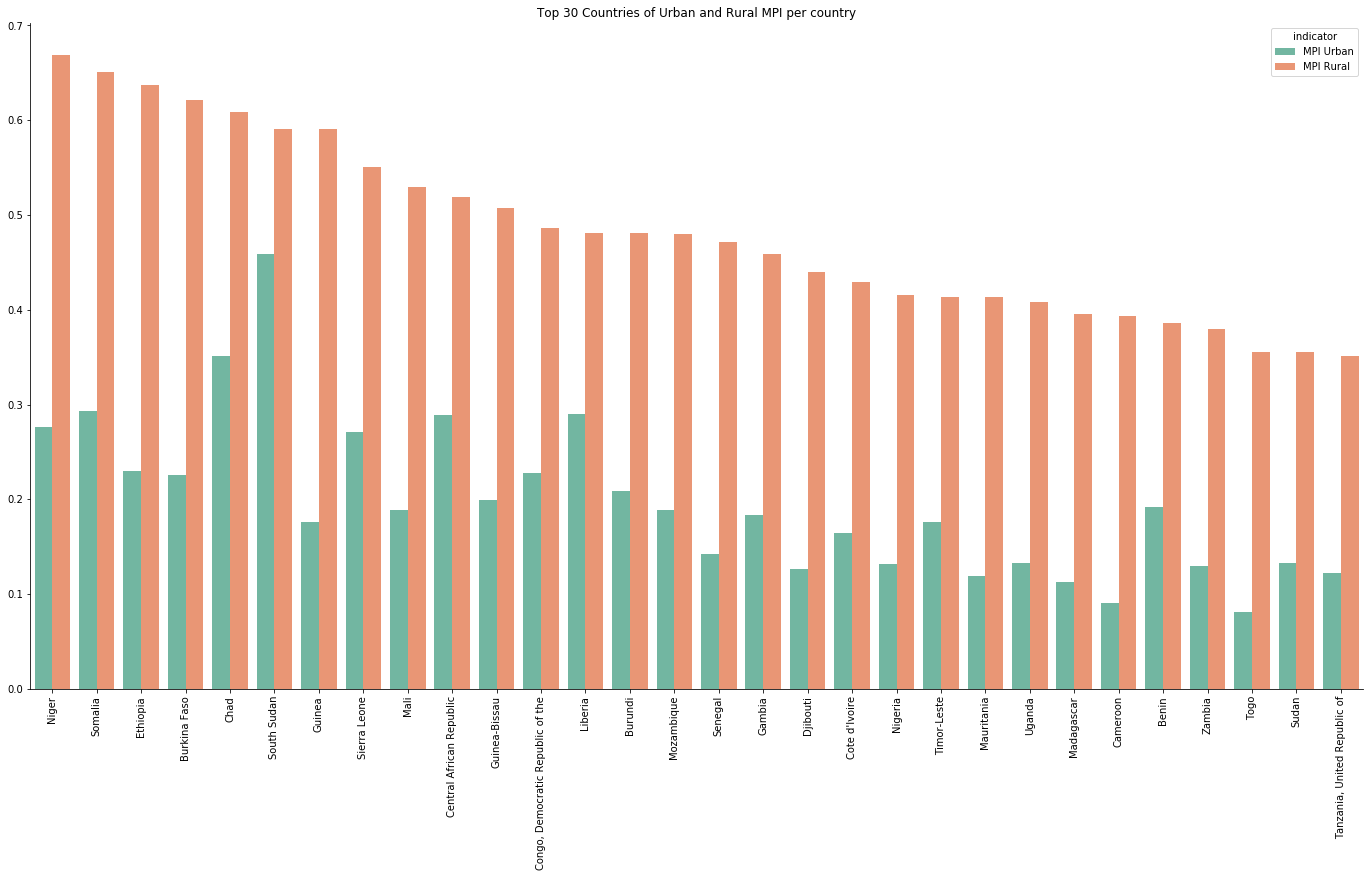

In [214]:
# Sort
mpi_national_df = mpi_national.sort_values(by=['MPI Rural'], ascending=False).head(30)
display(mpi_national_df)
# Transform the dataframe
mpi_national_urban = mpi_national_df[['country', 'MPI Urban']]
mpi_national_urban.rename(columns={'MPI Urban':'value'}, inplace=True)
mpi_national_urban['indicator'] = 'MPI Urban'

mpi_national_rural = mpi_national_df[['country', 'MPI Rural']]
mpi_national_rural.rename(columns={'MPI Rural':'value'}, inplace=True)
mpi_national_rural['indicator'] = 'MPI Rural'

mpi_urban_rural = mpi_national_urban.append(mpi_national_rural)

# Plot the urban and rural MPI per country
plt.figure(figsize=(12,7))
sns.factorplot(x='country', y='value', hue='indicator', data=mpi_urban_rural, 
                   kind='bar', legend_out=False,  size=10, aspect=2, palette = 'Set2')
sns.plotting_context("notebook", font_scale=2)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title("Top 30 Countries of Urban and Rural MPI per country")

plt.savefig('mpi.png')

Niger has the higest rural MPI, while South Sudan has the highest urban MPI

**J. Intensity of Deprivation in Rural and Urban areas - Country**

Lets have a look at the Kaggle Multidimensional Poverty Measures dataset to see what features it can give us which were not present.

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,country,value,indicator
96,Niger,51.2,Intensity of Deprivation Urban
99,Somalia,52.4,Intensity of Deprivation Urban
94,Ethiopia,49.5,Intensity of Deprivation Urban
92,Burkina Faso,49.4,Intensity of Deprivation Urban
100,Chad,54.1,Intensity of Deprivation Urban
84,Guinea,46.6,Intensity of Deprivation Urban
101,South Sudan,55.7,Intensity of Deprivation Urban
87,Mali,46.3,Intensity of Deprivation Urban
95,Sierra Leone,48.2,Intensity of Deprivation Urban
78,Nigeria,47.0,Intensity of Deprivation Urban


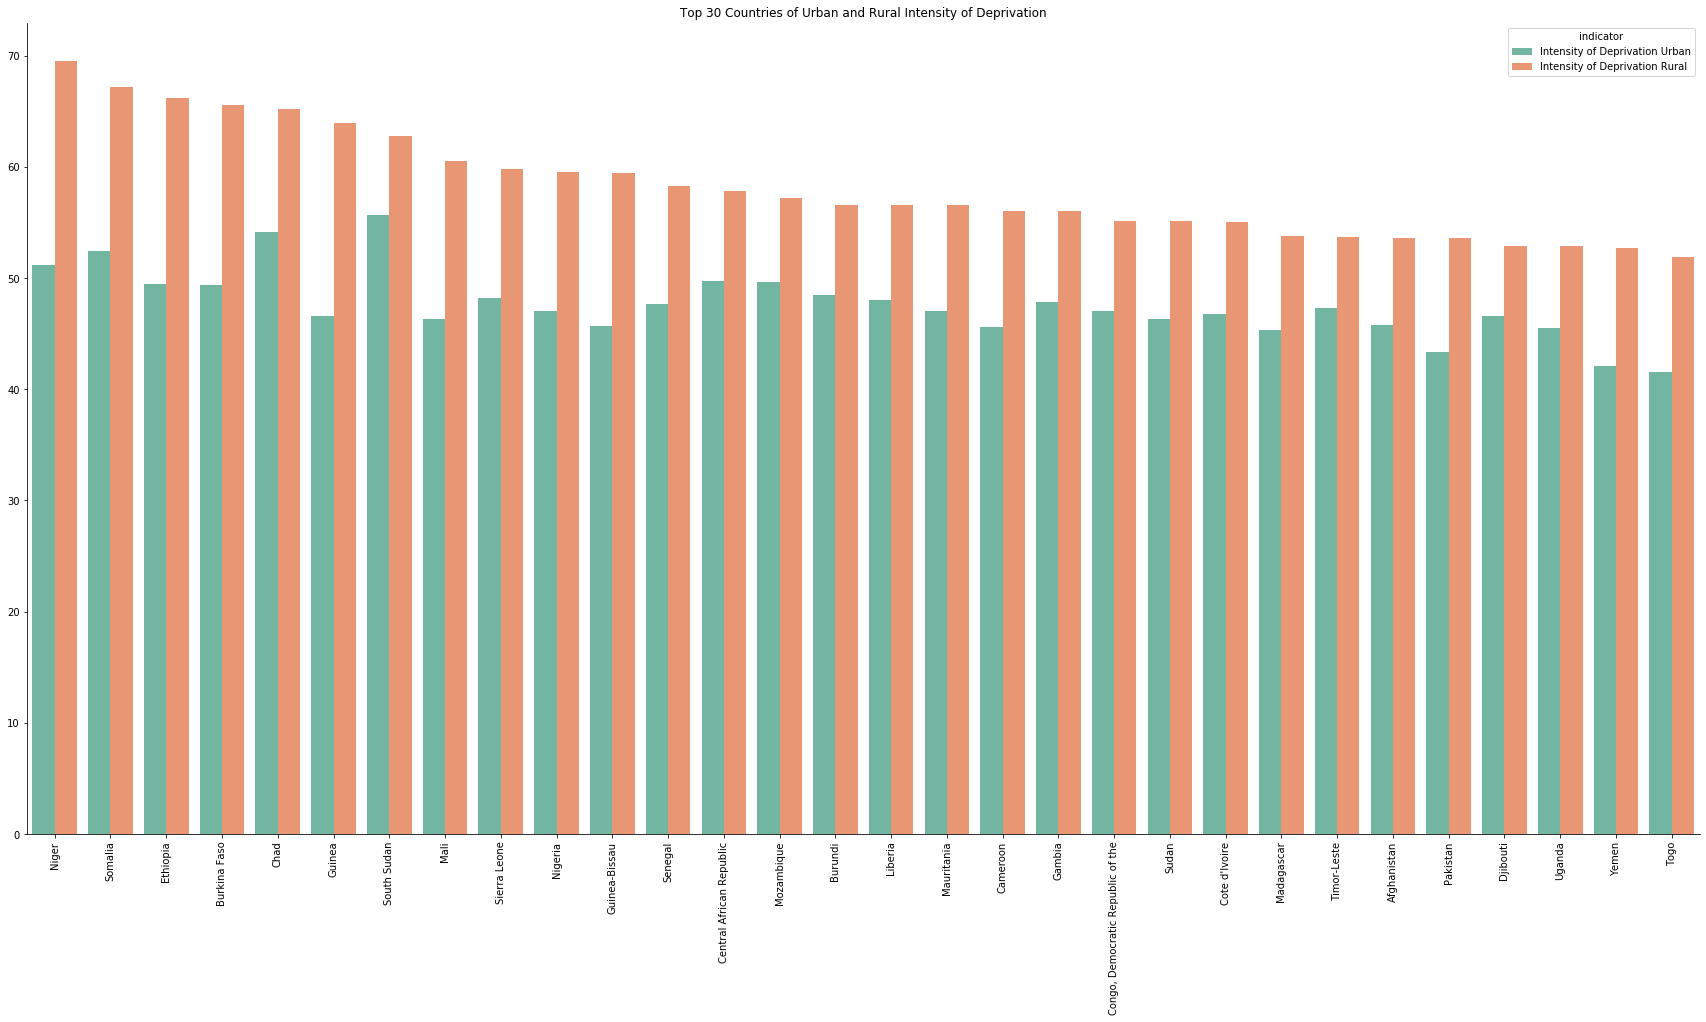

In [211]:
# Sort
mpi_national_df = mpi_national.sort_values(by=['Intensity of Deprivation Rural'], ascending=False).head(30)

# Transform the dataframe
mpi_national_urban2 = mpi_national_df[['country', 'Intensity of Deprivation Urban']]
mpi_national_urban2.rename(columns={'Intensity of Deprivation Urban':'value'}, inplace=True)
mpi_national_urban2['indicator'] = 'Intensity of Deprivation Urban'

mpi_national_rural2 = mpi_national_df[['country', 'Intensity of Deprivation Rural']]
mpi_national_rural2.rename(columns={'Intensity of Deprivation Rural':'value'}, inplace=True)
mpi_national_rural2['indicator'] = 'Intensity of Deprivation Rural'

mpi_urban_rural2  = mpi_national_urban2.append(mpi_national_rural2)

# Plot the urban and rural Intensity of Deprivation per country 
sns.factorplot(x='country', y='value', hue='indicator', data=mpi_urban_rural2, 
                kind='bar', legend_out=False, size=12, aspect=2, palette = 'Set2')
sns.plotting_context("notebook", font_scale=2)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title("Top 30 Countries of Urban and Rural Intensity of Deprivation")


Nigeria has the highest rural intensity of deprivation while South Sudan has the highest urban intensity of deprivation.

## 6. Inferential Statistics

The aim here is to identify other useful ways in which poverty scores can be assigned to target Kiva borrowers. During this second stage of development, a number of external datasets were identified, which could potentially provide useful features for new indices for determining poverty. However, the majority of the datasets identified provided statistics only at a national level. This is probably not accurate enough to be helpful to Kiva as an index so the work is presented simply as a record of the author's progress and in the hope that learnings can be gained when building indices at a more detailed level.


Kiva currently assigns scores to field partners and loan themes based on their location using the Multi-dimensional Poverty Index (MPI) and the Global Findex dataset for financial inclusion. Nation-level MPI Scores are broken into rural and urban scores and an average of these scores, weighted by rural_pct, is assigned to each Kiva field partner.
Sub-National MPI Scores are used for targeting within countries by assigning a given loan or loan theme to a given MPI region and aggregating the scores as a volume-weighted average. Financial Inclusion Scores have also already been explored to a limited extent by Kiva to measure financial inclusion per country, using the Global Findex database published by the World Bank.

**1. Calculating new MPI**

In [135]:
mpi_national.rename(columns={'Country': 'country'}, inplace=True)
theme_region = theme_region.drop_duplicates(subset=['country'])
mpi_national_df = mpi_national.merge(theme_region[['country', 'rural_pct']], on=['country'], how='left')

# There are 52 nulls in rural_pct so lets fill these with the median value
mpi_national_df['rural_pct'].fillna(mpi_national_df['rural_pct'].median(), inplace=True)

# Calculate national mpi according to Kiva's method
mpi_national_df['MPI'] = mpi_national_df['MPI Rural']*mpi_national_df['rural_pct']/100 + mpi_national_df[
    'MPI Urban']*(100-mpi_national_df['rural_pct'])/100

display(mpi_national_df.head(10))




,ISO,country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural,rural_pct,MPI
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3,70.0,0.00000
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3,70.0,0.00140
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1,72.0,0.00216
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7,70.0,0.00840
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9,70.0,0.00100
5,MKD,"Macedonia, The former Yugoslav Republic of",0.001,0.3,36.3,0.004,1.17,35.5,70.0,0.00310
6,TKM,Turkmenistan,0.001,0.4,33.9,0.001,0.32,34.3,70.0,0.00100
7,MDA,"Moldova, Republic of",0.001,0.3,42.2,0.003,1.01,34.7,70.0,0.00240
8,GUY,Guyana,0.001,0.4,38.2,0.017,4.25,40.4,70.0,0.01220
9,MNE,Montenegro,0.002,0.4,47.2,0.000,0.09,41.1,70.0,0.00060


**2. Human Development Index (HDI)**

The Human Development Index (HDI) is a summary measure of achievements in key dimensions of human development: a long and healthy life, access to knowledge, and a decent standard of living. It was first released in 1990 and has become widely accepted and used for policy formation. The MPI is actually a logical extension of this index so it is interesting to see how closely the two correlate.

In [139]:
# Join HDI dataframe to mpi_national_df
mpi_hdi_df = mpi_national_df.merge(hdi_df[['Country', 'Human Development Index (HDI)']], left_on=['country'], right_on=['Country'])
display(mpi_hdi_df.head(10))

,ISO,country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural,rural_pct,MPI,Country,Human Development Index (HDI)
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3,70.0,0.00000,Kazakhstan,0.788
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3,70.0,0.00140,Serbia,0.771
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1,72.0,0.00216,Kyrgyzstan,0.655
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7,70.0,0.00840,Tunisia,0.721
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9,70.0,0.00100,Armenia,0.733
5,TKM,Turkmenistan,0.001,0.4,33.9,0.001,0.32,34.3,70.0,0.00100,Turkmenistan,0.688
6,GUY,Guyana,0.001,0.4,38.2,0.017,4.25,40.4,70.0,0.01220,Guyana,0.636
7,MNE,Montenegro,0.002,0.4,47.2,0.000,0.09,41.1,70.0,0.00060,Montenegro,0.802
8,LCA,Saint Lucia,0.002,0.5,36.7,0.004,1.05,35.2,70.0,0.00340,Saint Lucia,0.729
9,MEX,Mexico,0.002,0.5,38.0,0.014,3.37,41.1,75.0,0.01100,Mexico,0.756


Correlation and P-Value:  (-0.8776833461662292, 8.070833307013719e-31)


Text(0.5, 1.0, 'MPI vs HDI')

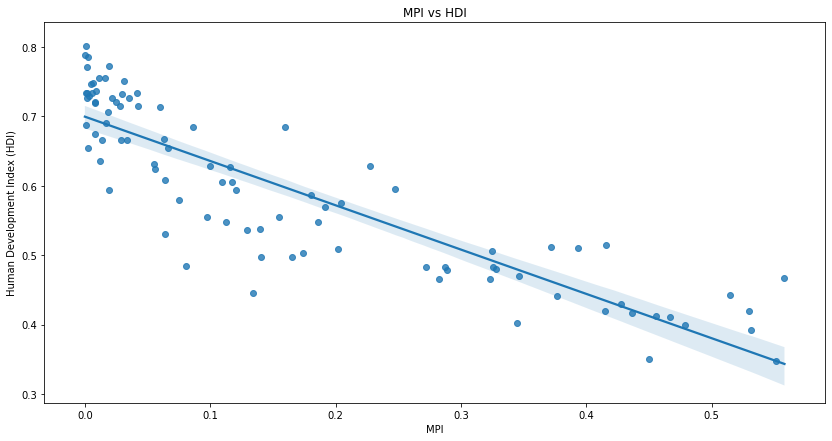

In [152]:
import scipy.stats

print('Correlation and P-Value: ',scipy.stats.pearsonr(mpi_hdi_df.loc[:, 'Human Development Index (HDI)'], mpi_hdi_df.loc[:, 'MPI']))
plt.figure(figsize=(14,7))
sns.plotting_context("notebook", font_scale=1.2)
sns.regplot(x='MPI', y='Human Development Index (HDI)', data=mpi_hdi_df)
plt.title('MPI vs HDI')

There is a relatively high correlation between the HDI and MPI.



In [155]:
X = mpi_hdi_df['MPI']
y = mpi_hdi_df['Human Development Index (HDI)']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     Human Development Index (HDI)   R-squared (uncentered):                   0.308
Model:                                       OLS   Adj. R-squared (uncentered):              0.300
Method:                            Least Squares   F-statistic:                              40.93
Date:                           Sun, 26 Jul 2020   Prob (F-statistic):                    6.50e-09
Time:                                   00:41:56   Log-Likelihood:                         -68.625
No. Observations:                             93   AIC:                                      139.3
Df Residuals:                                 92   BIC:                                      141.8
Df Model:                                      1                                                  
Covariance Type:                       nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MPI            1.4472      0.226      6.398      0.000       0.998       1.896
==============================================================================
Omnibus:                       12.396   Durbin-Watson:                   0.100
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.357
Skew:                          -0.661   Prob(JB):                      0.00929
Kurtosis:                       2.183   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3. Financial Inclusion**

Because Kiva is concerned with financial excluse areas, we can also use Global Findex Database published by the World Bank. Global Findex Database is one of the most popular and comprehensive database on financial inclusion that measures people's use of financial services across countries. The database consists of more than 100 indicators that captures financial inclusion. For this analysis, we chose three indicators from the database that captures the essence of financial inclusion: 


- percentage of people (age 15+) who have an account
- percentage of people (age 15+) who have formal savings
- percentage of people (age 15+) who have access to formal borrowing


In [157]:
findex = pd.read_csv('FINDEXData.csv', header = 0)



In [186]:
# Keep relevant indicators only
findex_df = findex.loc[(findex['Indicator Name'] == 'Account (% age 15+) [ts]') 
                                  | (findex['Indicator Name'] == 'Borrowed from a financial institution (% age 15+) [ts]')
                                  | (findex['Indicator Name'] == 'Saved at a financial institution (% age 15+) [ts]')]

# Because there are less countries available in findex than in Kiva loans, we will use uniqe()
# function to match the data (keeping relevant countries only that have MPI)

# Also note that we are using year 2014
findex_df = findex_df[findex_df['Country Name'].isin(kiva_all['country'].unique())]

findex_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2011,2014,MRV
14144,Afghanistan,AFG,Account (% age 15+) [ts],WP_time_10.1,9.005013,9.961000,9.961000
14223,Afghanistan,AFG,Borrowed from a financial institution (% age 1...,WP_time_06.1,7.402193,3.588029,3.588029
14748,Afghanistan,AFG,Saved at a financial institution (% age 15+) [ts],WP_time_04.1,2.819420,3.566395,3.566395
25636,Belize,BLZ,Account (% age 15+) [ts],WP_time_10.1,NaN,48.209250,48.209250
25715,Belize,BLZ,Borrowed from a financial institution (% age 1...,WP_time_06.1,NaN,13.677770,13.677770


In [162]:
# Pivot
findex_pivot_df = findex_df.pivot(index='Country Name', columns='Indicator Name', values='MRV').reset_index().rename_axis(None, axis=1)
findex_pivot_df.columns = ['country_name', 'account', 'formal_savings', 'formal_borrowing']

findex_pivot_df.head(5)

,country_name,account,formal_savings,formal_borrowing
0,Afghanistan,9.96100,3.588029,3.566395
1,Belize,48.20925,13.677770,22.084790
2,Benin,16.62083,7.647969,7.144032
3,Bhutan,33.66591,4.209573,22.568420
4,Brazil,68.12315,11.933180,12.329160


In [165]:
# Steps to calculating the Findex 
# We will use the method used to calcualte the HDI as a guideline.

findex_pivot_df['findex'] = scipy.stats.mstats.gmean(findex_pivot_df.iloc[:,1:4],axis=1)
findex_pivot_df.head()

,country_name,account,formal_savings,formal_borrowing,findex
0,Afghanistan,9.96100,3.588029,3.566395,5.032643
1,Belize,48.20925,13.677770,22.084790,24.420037
2,Benin,16.62083,7.647969,7.144032,9.683836
3,Bhutan,33.66591,4.209573,22.568420,14.733633
4,Brazil,68.12315,11.933180,12.329160,21.560631


Text(0.5, 1.0, 'Findex by Country')

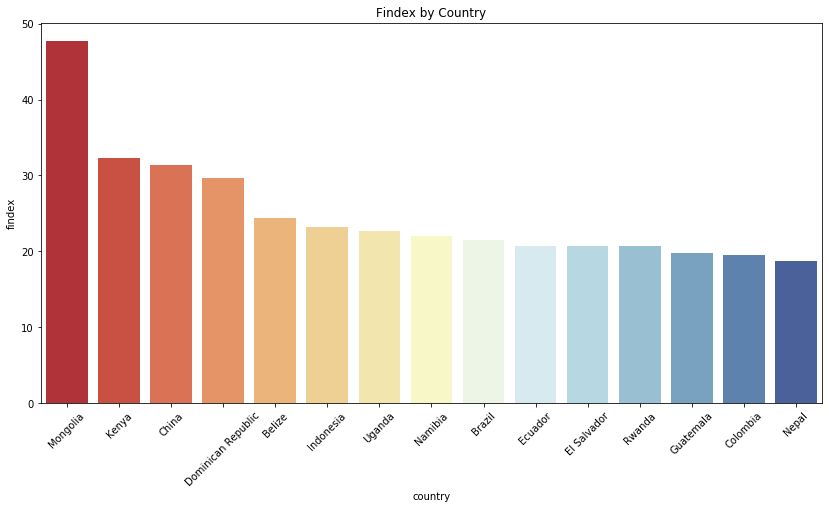

In [188]:
findex_pivot_df_top = findex_pivot_df.sort_values(by=['findex'], ascending=False).head(15)
# Plot barplot
plt.figure(figsize=(14,7))
sns.barplot(x ='country_name', y = 'findex', data=findex_pivot_df_top, palette = "RdYlBu")
sns.plotting_context("notebook", font_scale=1.2)
plt.ylabel('')
plt.xticks(rotation = 45)
plt.xlabel('country')
plt.ylabel('findex')
plt.title("Findex by Country")


Mongolia has the highest findex score in terms of countries.

In [189]:
# Join
mpi_findex = mpi_hdi_df.merge(findex_pivot_df[['country_name', 'findex']], left_on=['country'], right_on=['country_name'])
mpi_findex.drop('country_name', axis=1, inplace=True)

mpi_findex.head(5)

,ISO,country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural,rural_pct,MPI,Country,Human Development Index (HDI),findex
0,ECU,Ecuador,0.005,1.5,36.5,0.030,7.68,39.3,99.0,0.02975,Ecuador,0.732,20.695537
1,JOR,Jordan,0.006,1.7,34.7,0.007,1.81,36.2,67.0,0.00667,Jordan,0.748,10.783558
2,BLZ,Belize,0.006,1.6,37.9,0.028,6.98,39.9,100.0,0.02800,Belize,0.715,24.420037
3,CHN,China,0.007,1.9,38.9,0.028,6.74,42.1,70.0,0.02170,China,0.727,31.422238
4,COL,Colombia,0.009,2.3,37.2,0.061,14.44,42.6,30.0,0.02460,Colombia,0.720,19.520125


In [190]:
mpi_findex.to_csv ('findex.csv', index = False, header=True)

Correlation and P-Value:  (-0.4809864768351191, 0.001262316745155461)


Text(0.5, 1.0, 'MPI vs Findex')

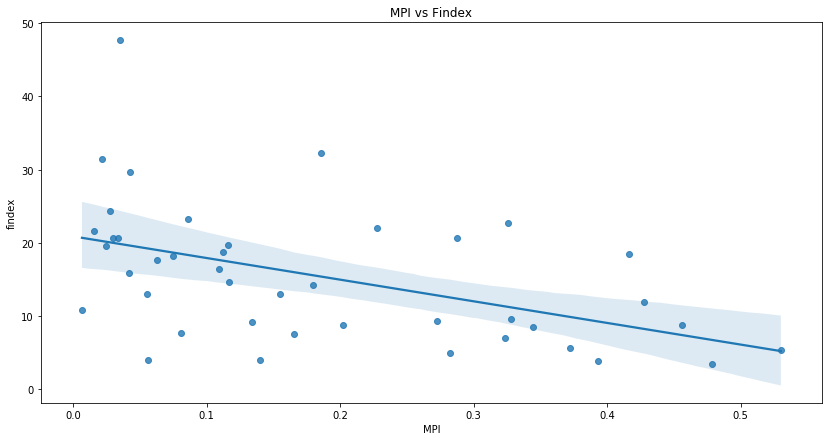

In [181]:
print('Correlation and P-Value: ',scipy.stats.pearsonr(mpi_findex.loc[:, 'findex'], mpi_findex.loc[:, 'MPI']))
plt.figure(figsize=(14,7))
sns.plotting_context("notebook", font_scale=1.2)
sns.regplot(x='MPI', y='findex', data=mpi_findex)
plt.title('MPI vs Findex')

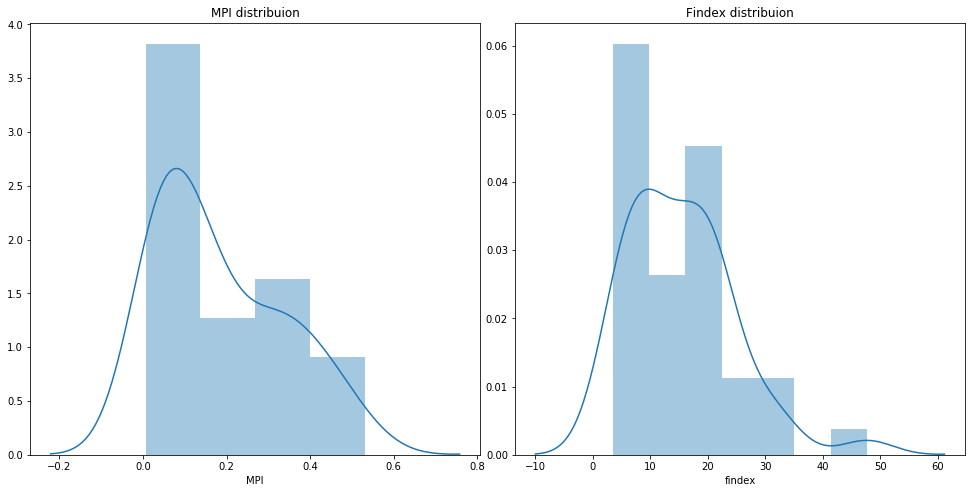

In [184]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1).set_title("MPI distribuion")
sns.distplot(mpi_findex.MPI)

plt.subplot(1,2,2).set_title("Findex distribuion")
sns.distplot(mpi_findex.findex)

plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=2.0, rect=[0, 0, 0.95, 0.95])

Countries with high poverty levels often score low on the financial inclusion index but there is no clear correlation between the two metrics, indicating that the Findex could be a useful measure that is unrelated to poverty.